In [14]:
import pandas as pd

In [15]:
# https://www.kaggle.com/datasets/nirmalgaud/customer-complaints-ticket-classification

# https://www.kaggle.com/datasets/aniketg11/supportticketsclassification

In [16]:
df = pd.read_csv("customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [17]:
# prompt: calculate time taken to solve the issue using First Response Time (start time), Time to Resolution (end time), and put it in bins of 5 hours

import pandas as pd

# Assuming your DataFrame is named 'df' and contains columns 'First Response Time' and 'Time to Resolution'
# Replace 'First Response Time' and 'Time to Resolution' with your actual column names if they are different.

# Convert time columns to datetime objects if they are not already
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Calculate the time taken to solve the issue
df['Time Taken'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600  # Time difference in hours

# Create bins of 5 hours
bins = range(0, int(df['Time Taken'].max()) + 6, 5)  # Create bins up to the maximum time taken, with 5-hour intervals

# Use pd.cut to categorize the time taken into bins
df['Time Taken Bins'] = pd.cut(df['Time Taken'], bins=bins, right=False)

# Print the DataFrame with the new 'Time Taken Bins' column
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Time Taken,Time Taken Bins
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000,"[5.0, 10.0)"
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333,NaN
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333,"[15.0, 20.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaT,NaT,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaT,NaT,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,-5.216667,NaN
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,-12.933333,NaN


In [18]:
df["Time Taken Bins"].value_counts()

Time Taken Bins
[0, 5)      582
[5, 10)     397
[10, 15)    240
[15, 20)    156
[20, 25)     29
Name: count, dtype: int64

In [19]:
df.loc[df["Time Taken Bins"].map(str).eq("[20, 25)"), :]

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Time Taken,Time Taken Bins
418,419,Kara Wright PhD,dawnmartinez@example.net,47,Female,Garmin Forerunner,2020-06-17,Technical issue,Software bug,I'm having an issue with the {product_purchase...,Closed,It professor television little director discus...,Low,Chat,2023-05-31 22:20:10,2023-06-01 20:41:10,2.0,22.350000,"[20, 25)"
755,756,Holly Thomas,jennifer65@example.net,26,Other,Philips Hue Lights,2020-10-06,Refund request,Installation support,I'm having trouble connecting my {product_purc...,Closed,Represent focus middle.,High,Chat,2023-05-31 23:58:02,2023-06-01 20:38:02,2.0,20.666667,"[20, 25)"
815,816,Dr. Sarah Gardner,nicholasclements@example.net,27,Other,Nintendo Switch Pro Controller,2021-04-11,Product inquiry,Hardware issue,I'm having an issue with the {product_purchase...,Closed,Product thought own walk six money.,Low,Social media,2023-06-01 00:42:26,2023-06-01 21:50:26,4.0,21.133333,"[20, 25)"
1239,1240,John Solis,neilpeters@example.com,19,Other,Bose SoundLink Speaker,2020-02-25,Cancellation request,Network problem,I'm encountering a software bug in the {produc...,Closed,Start spend from.,Critical,Email,2023-06-01 01:08:12,2023-06-01 21:48:12,1.0,20.666667,"[20, 25)"
1764,1765,Erica Scott DVM,millsdenise@example.net,40,Female,Microsoft Xbox Controller,2021-02-21,Refund request,Peripheral compatibility,I've forgotten my password for my {product_pur...,Closed,Quite article doctor hair should fine boy.,Low,Chat,2023-06-01 01:26:03,2023-06-01 22:11:03,2.0,20.750000,"[20, 25)"
1838,1839,Tina Brown,mary24@example.com,18,Other,HP Pavilion,2020-08-22,Refund request,Software bug,I'm having an issue with the {product_purchase...,Closed,Turn direction rule kitchen strong health.,Low,Chat,2023-05-31 23:03:45,2023-06-01 21:25:45,4.0,22.366667,"[20, 25)"
2648,2649,Lauren White,hclark@example.org,31,Female,Amazon Echo,2021-11-04,Billing inquiry,Hardware issue,I've forgotten my password for my {product_pur...,Closed,Care medical brother until.,Low,Social media,2023-05-31 23:25:48,2023-06-01 21:43:48,4.0,22.300000,"[20, 25)"
2715,2716,Joseph Brown,seanclark@example.org,27,Female,PlayStation,2020-08-01,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Closed,Himself Congress population.,Low,Email,2023-05-31 23:04:19,2023-06-01 21:41:19,3.0,22.616667,"[20, 25)"
3008,3009,Kimberly Mercado,patrickwilliams@example.org,41,Female,PlayStation,2021-06-23,Refund request,Hardware issue,I'm having an issue with the {product_purchase...,Closed,Nation beautiful per economy project.,Low,Social media,2023-06-01 00:58:50,2023-06-01 21:41:50,5.0,20.716667,"[20, 25)"
3030,3031,William Stein,tthompson@example.net,29,Male,Amazon Echo,2020-11-17,Refund request,Product recommendation,I'm unable to access my {product_purchased} ac...,Closed,To economic however result strategy produce away.,High,Email,2023-05-31 23:13:23,2023-06-01 19:45:23,4.0,20.533333,"[20, 25)"


In [20]:
df.shape

(8469, 19)

In [21]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Time Taken', 'Time Taken Bins'],
      dtype='object')

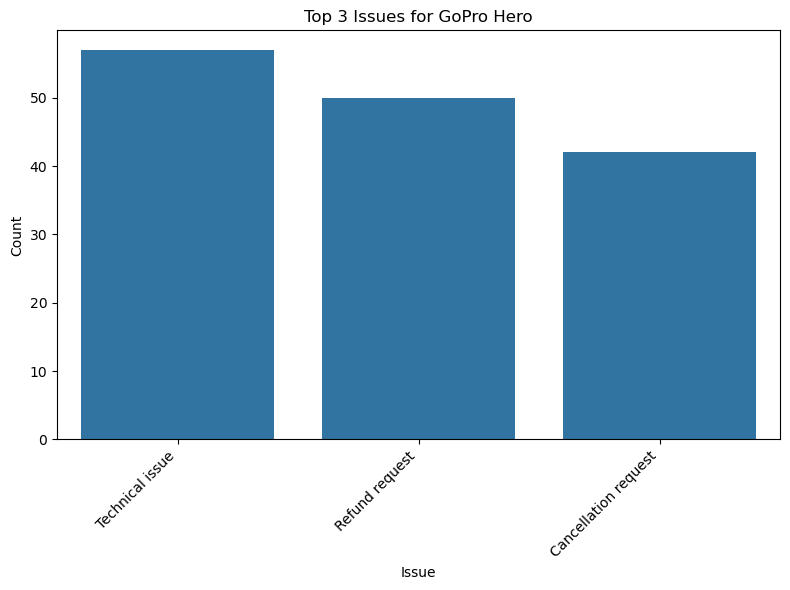

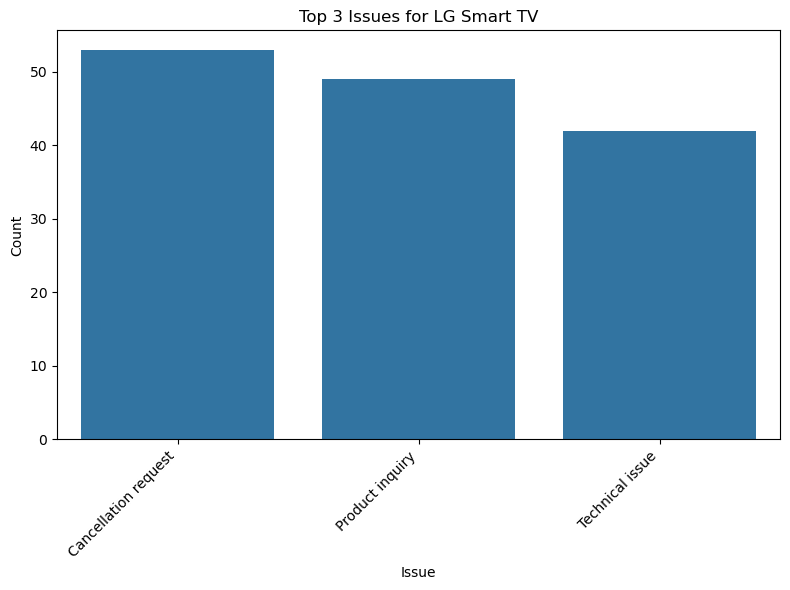

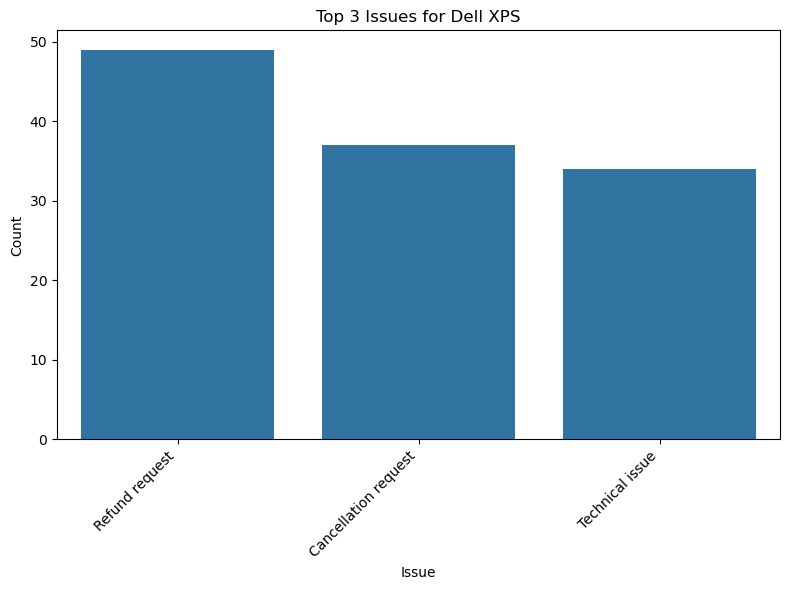

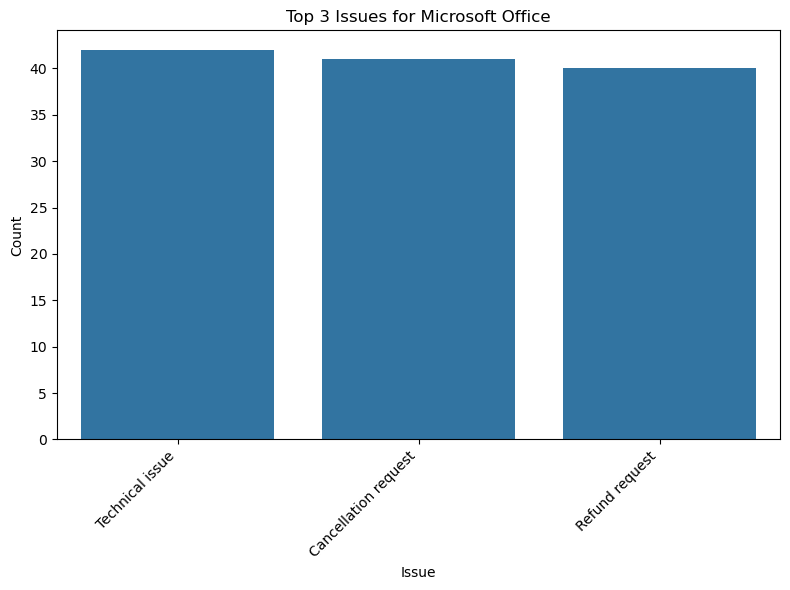

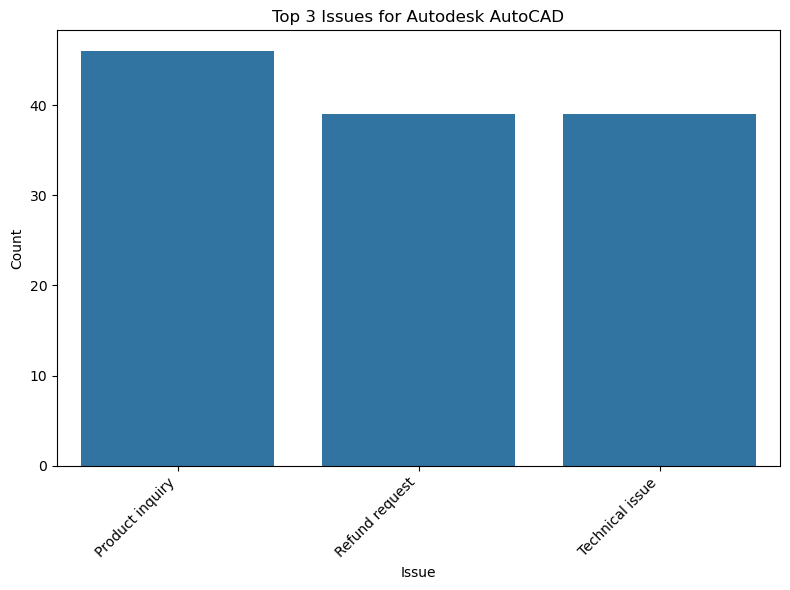

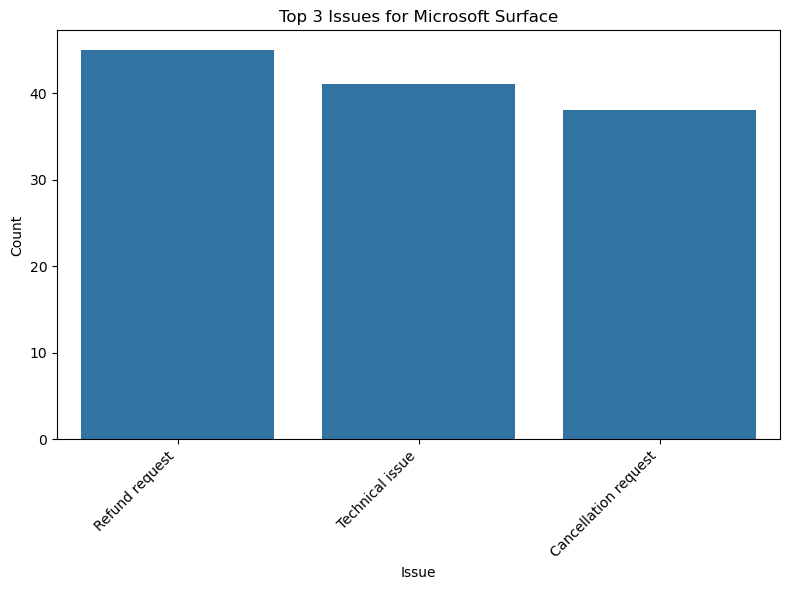

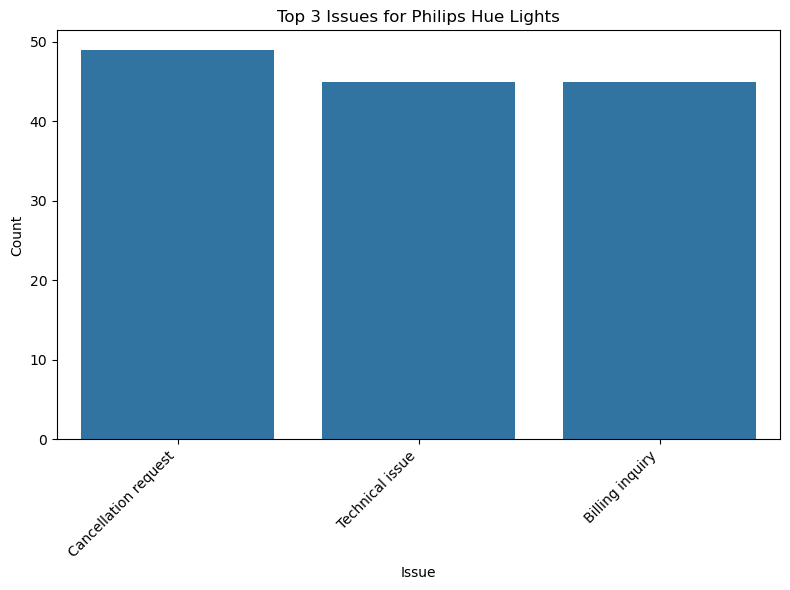

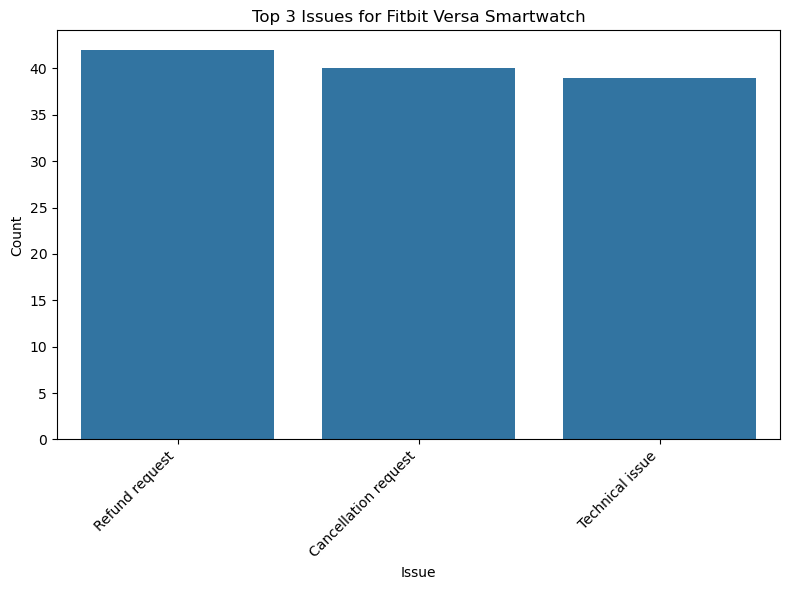

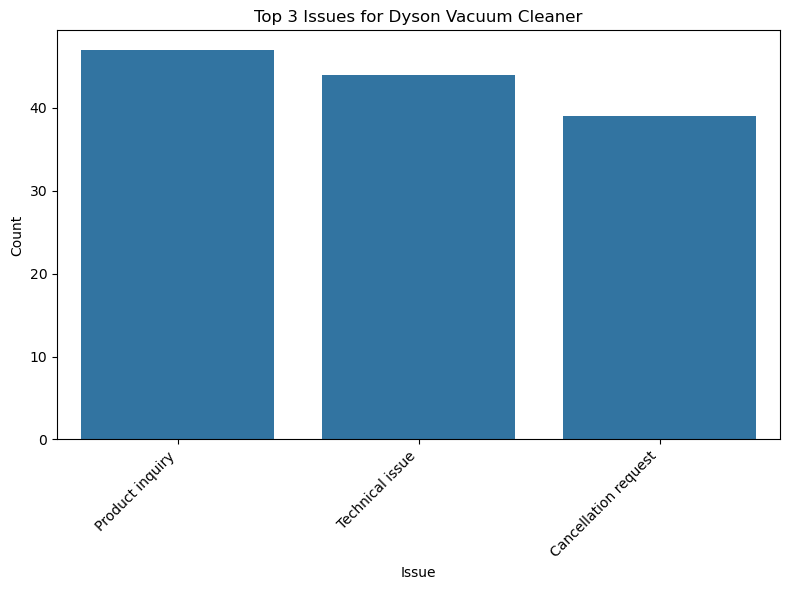

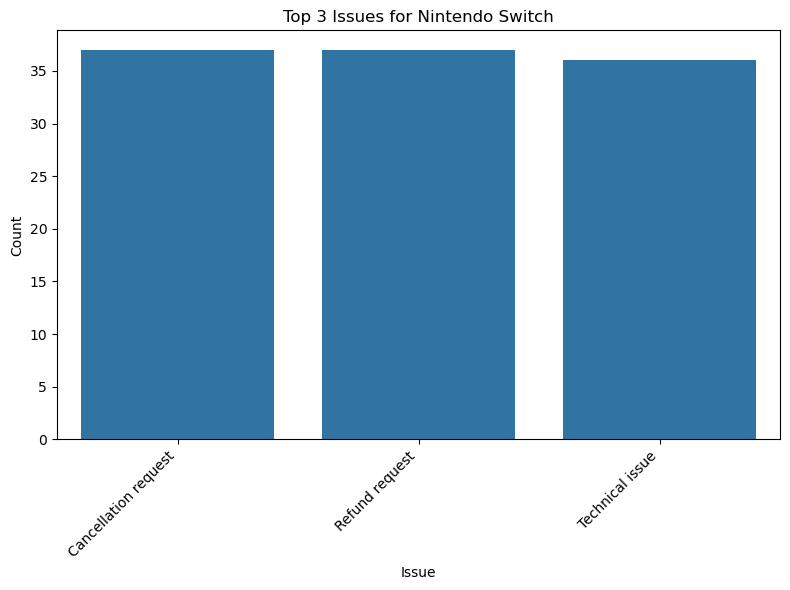

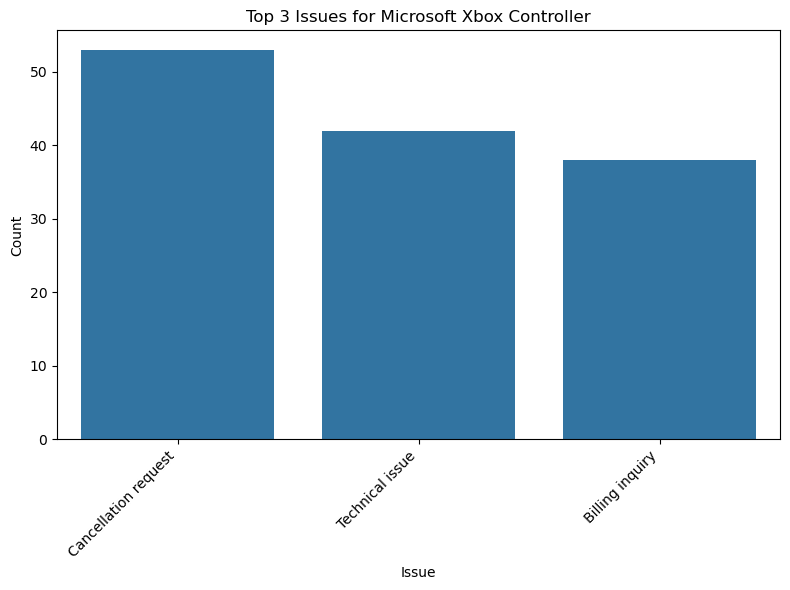

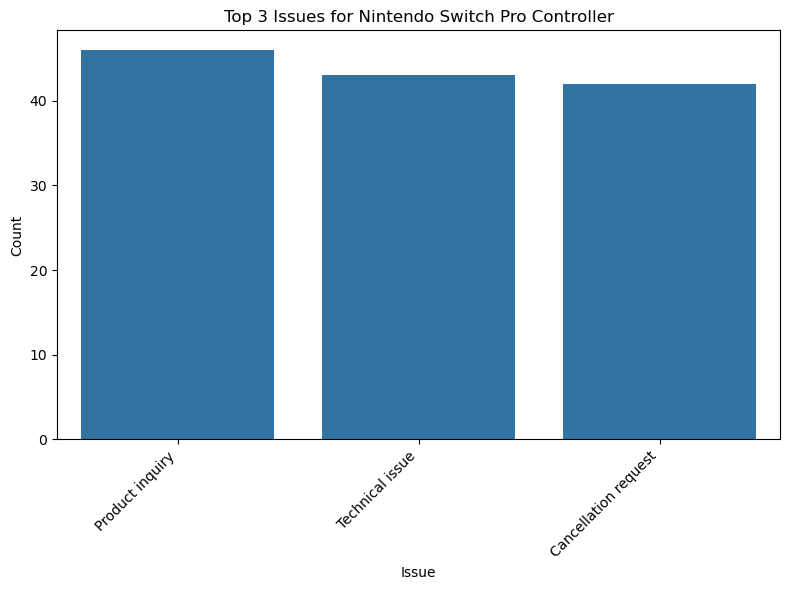

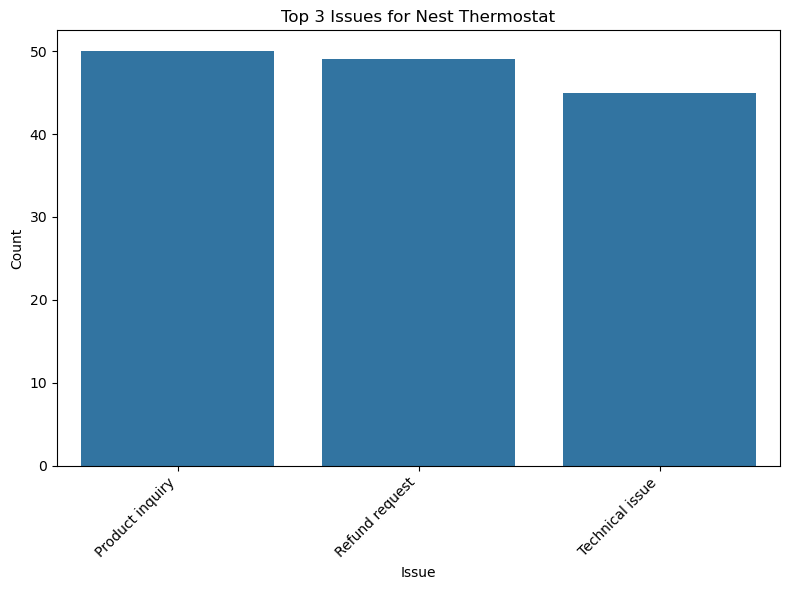

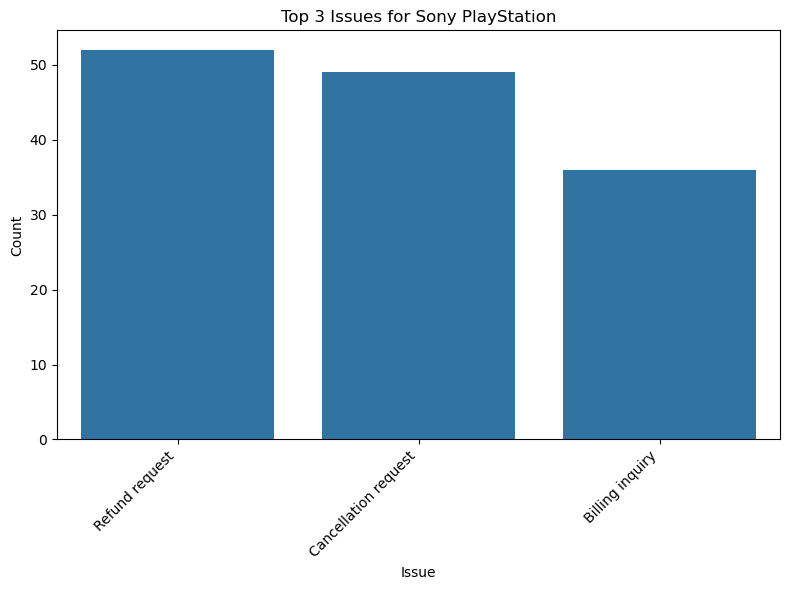

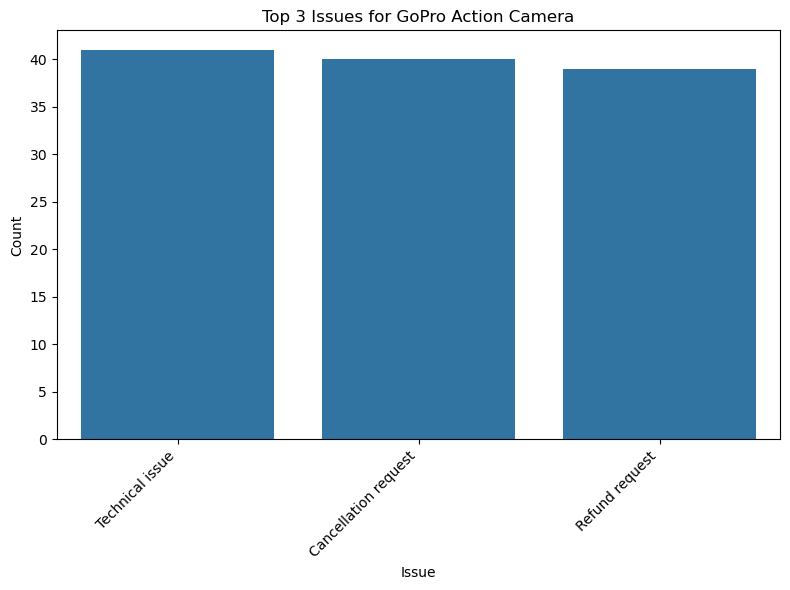

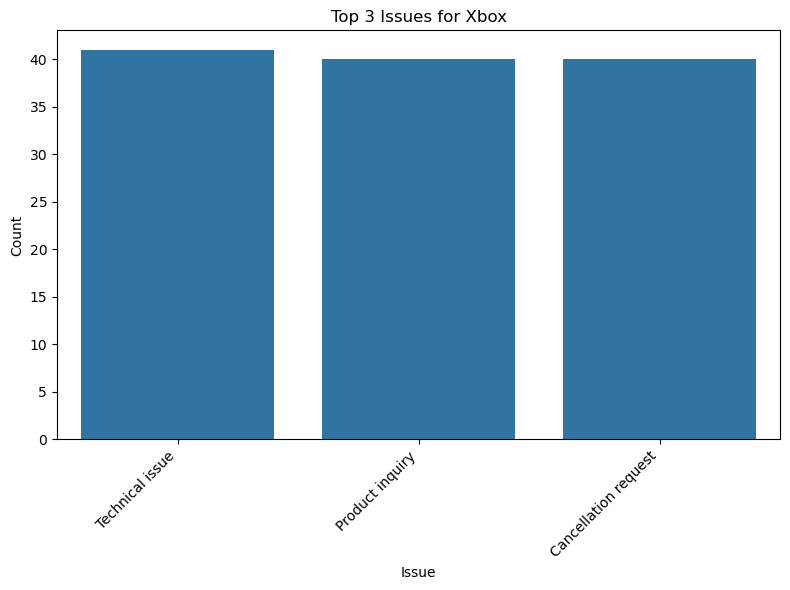

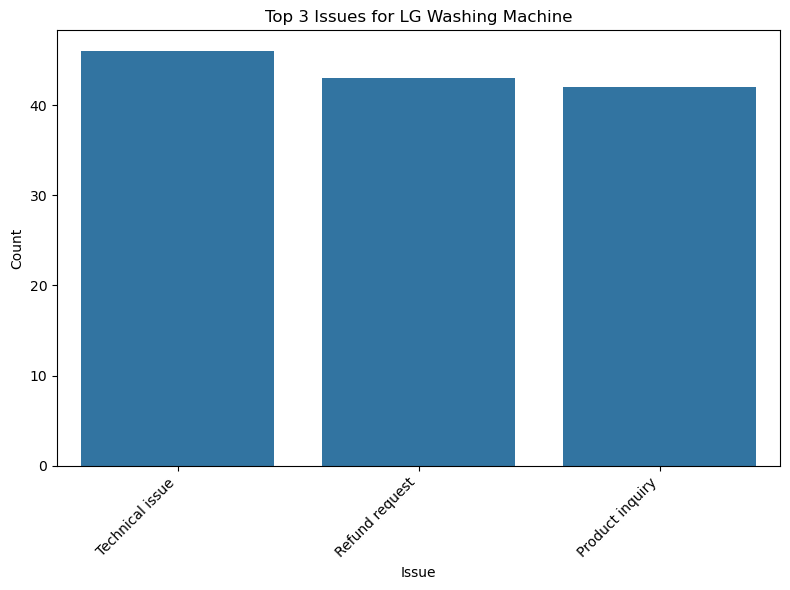

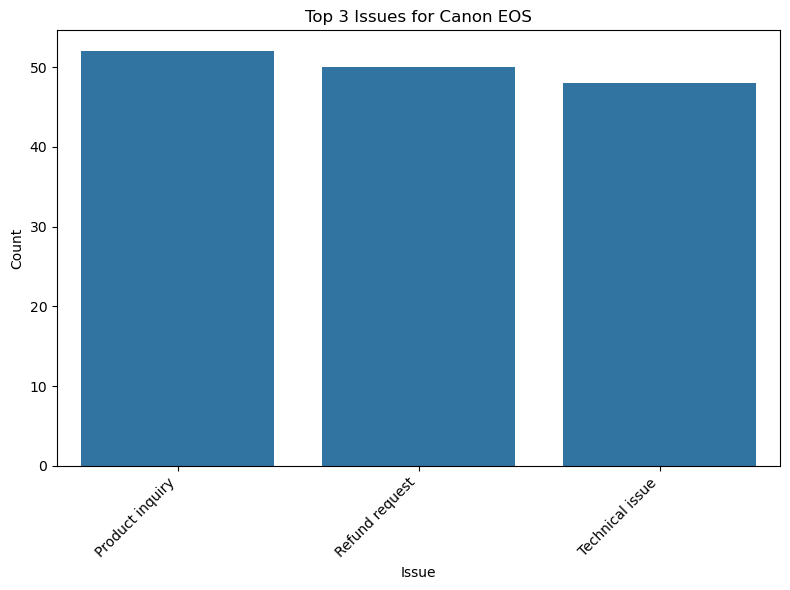

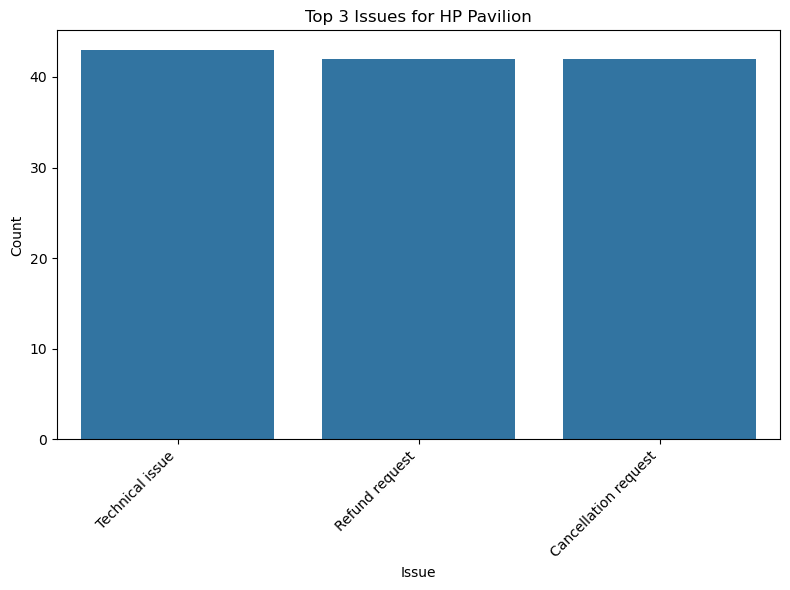

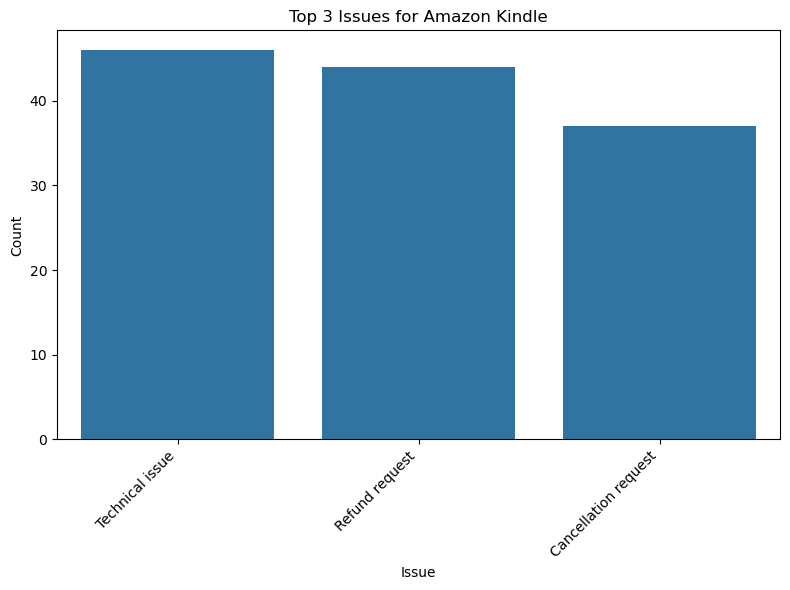

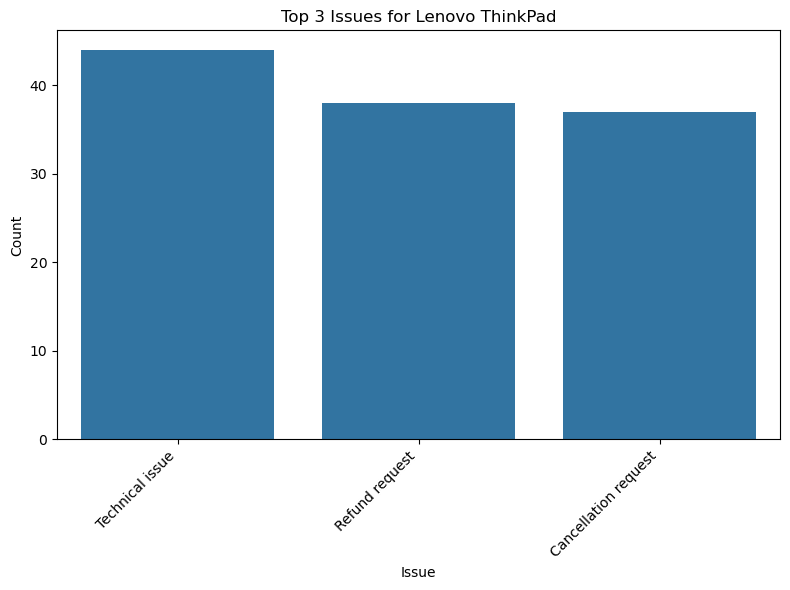

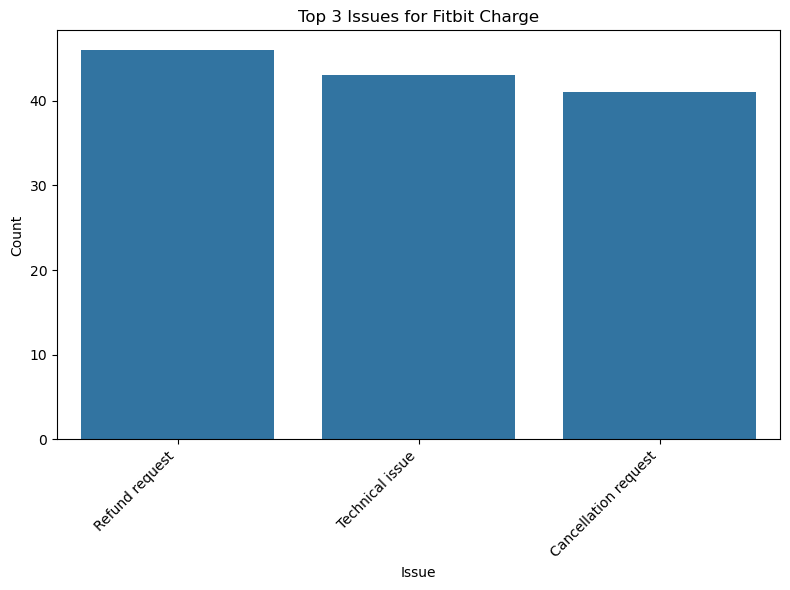

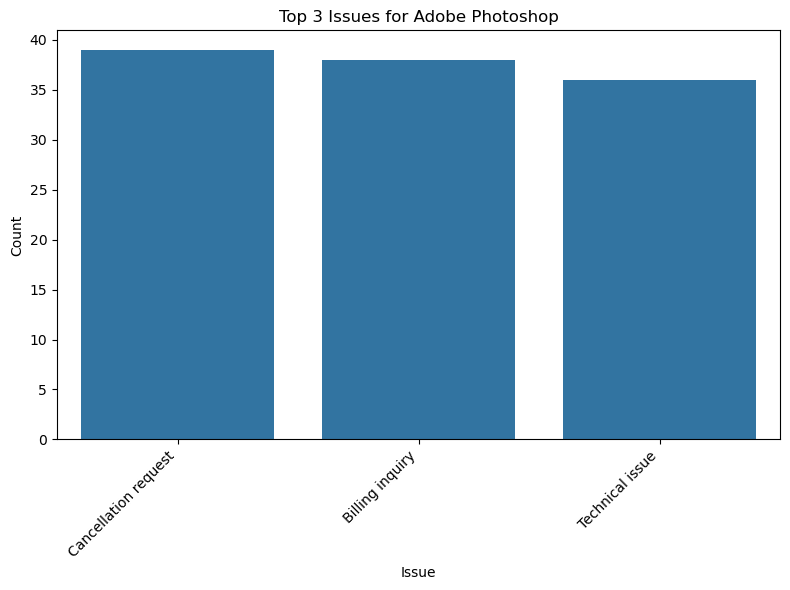

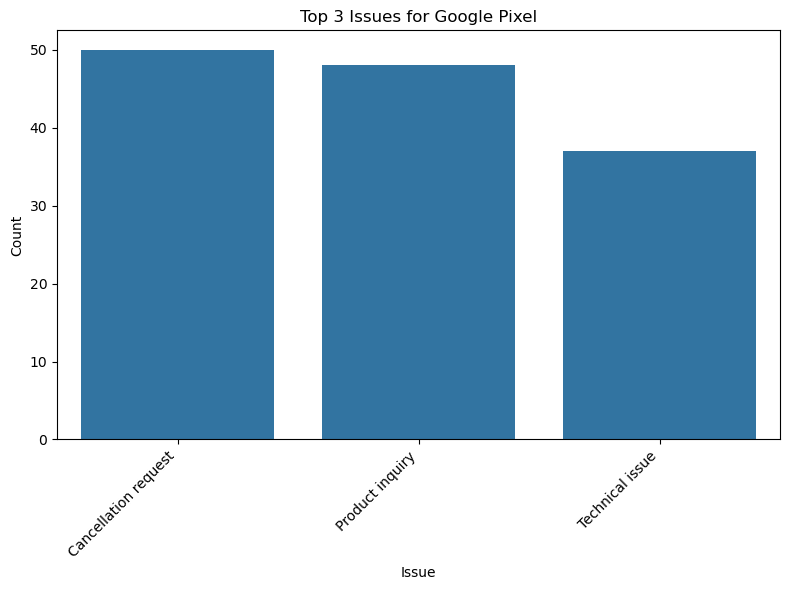

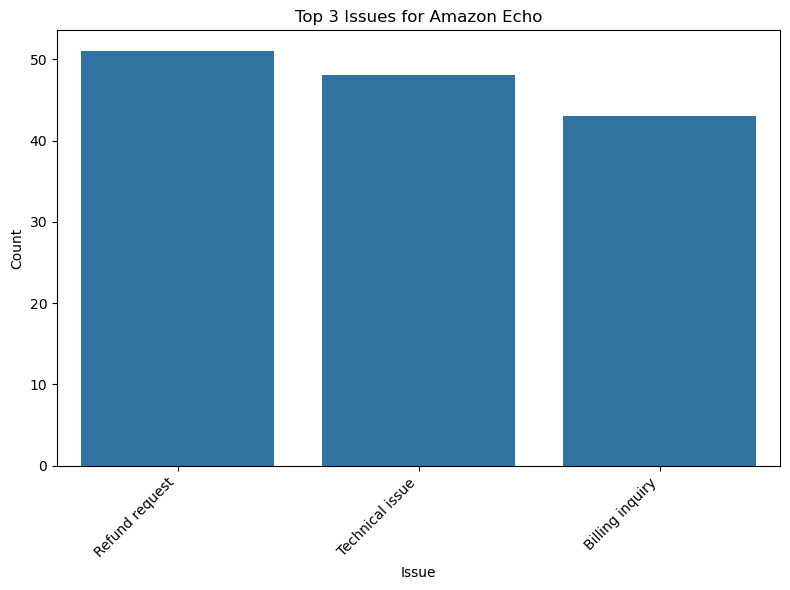

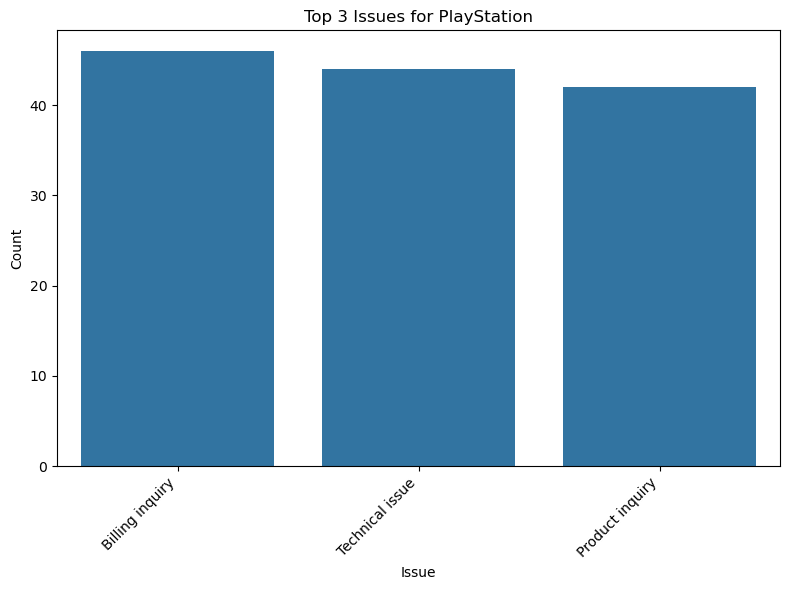

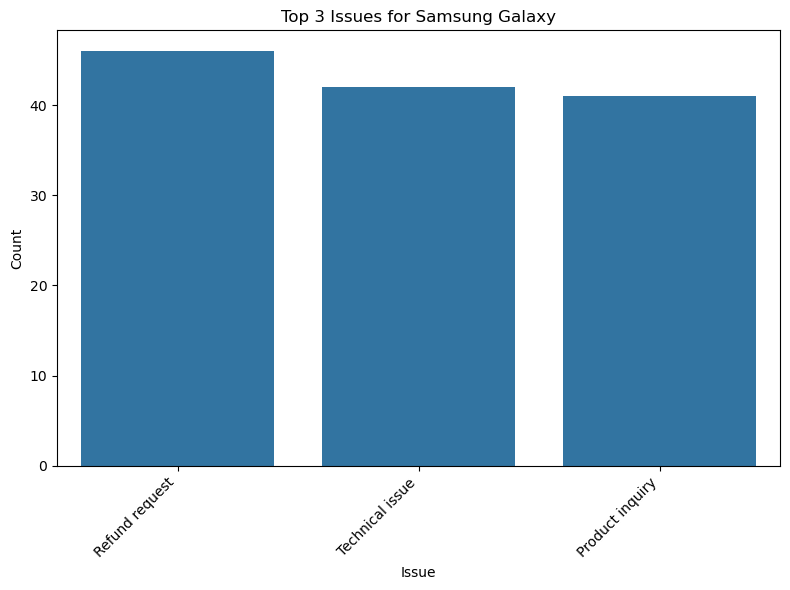

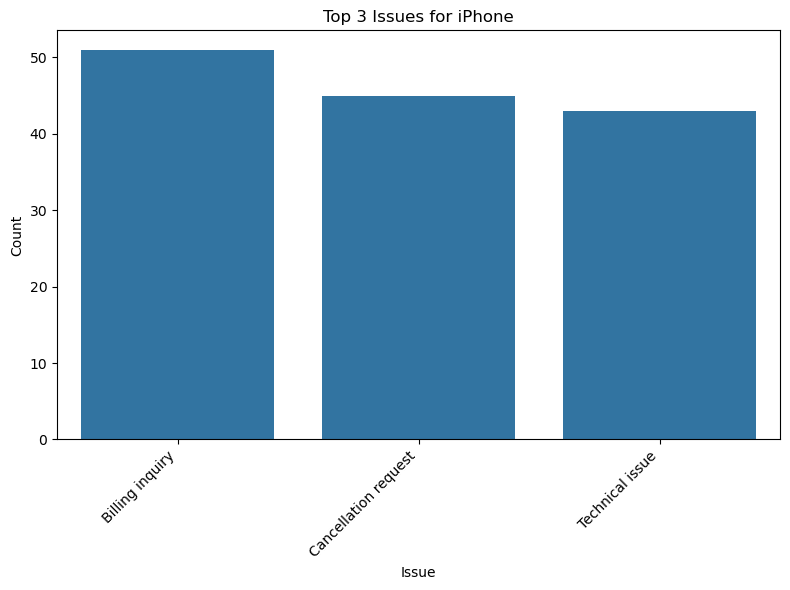

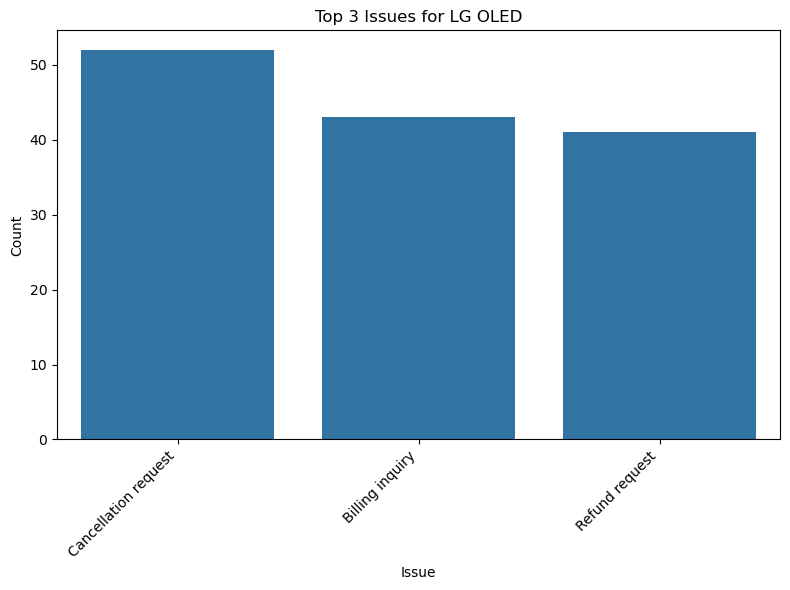

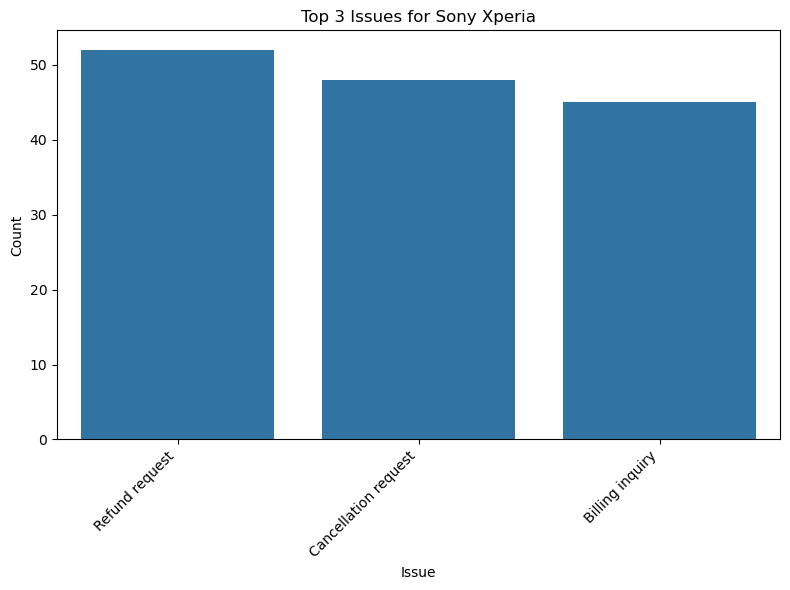

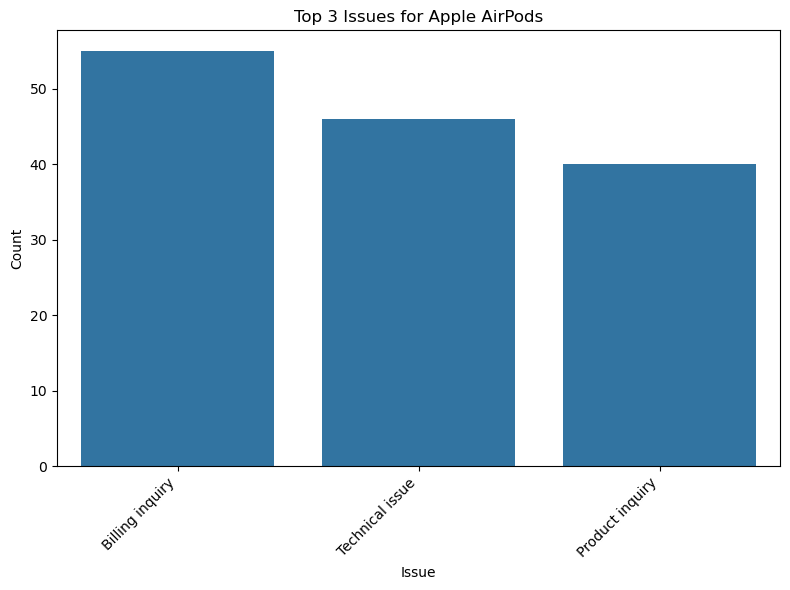

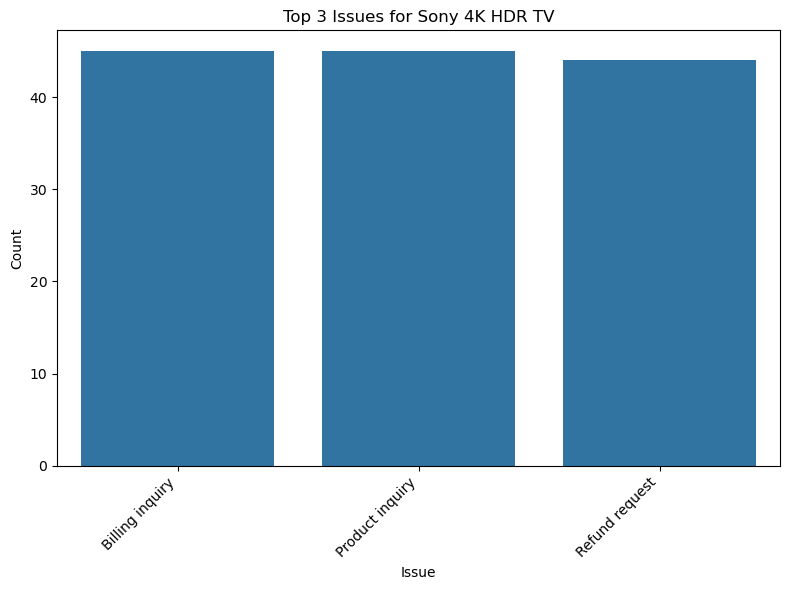

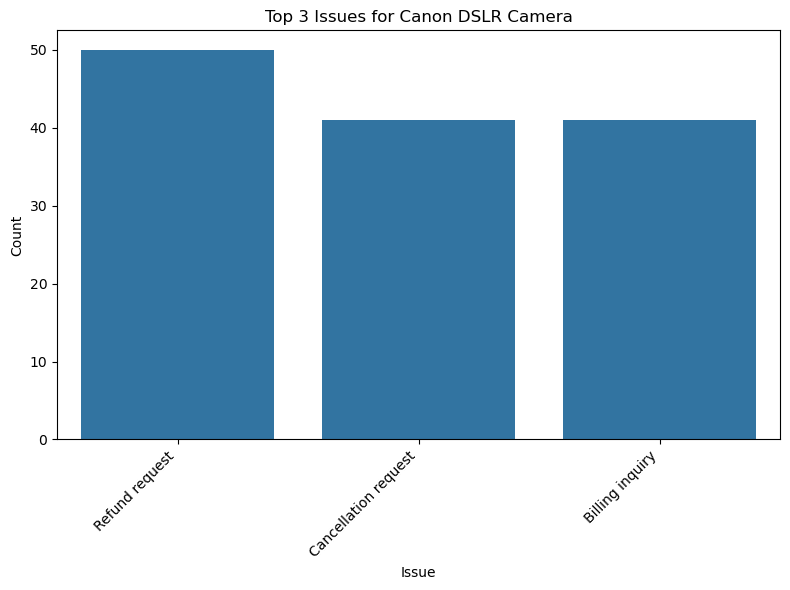

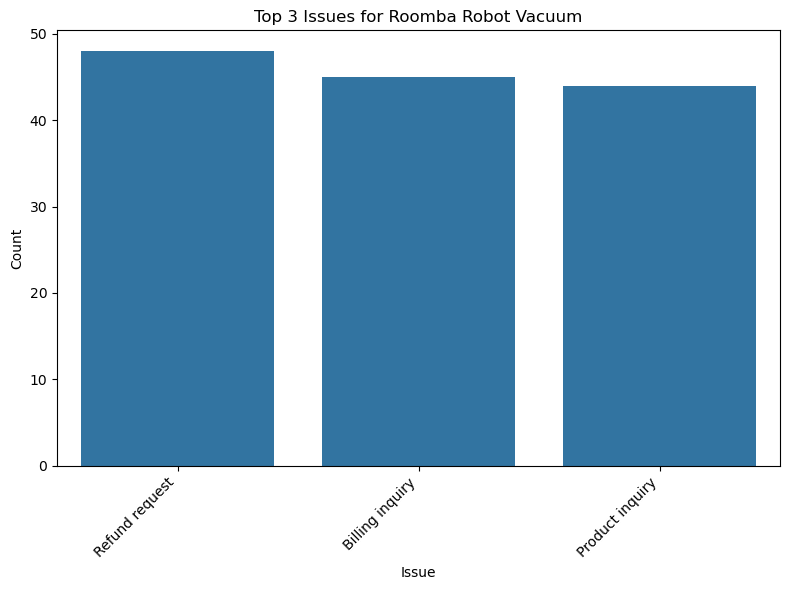

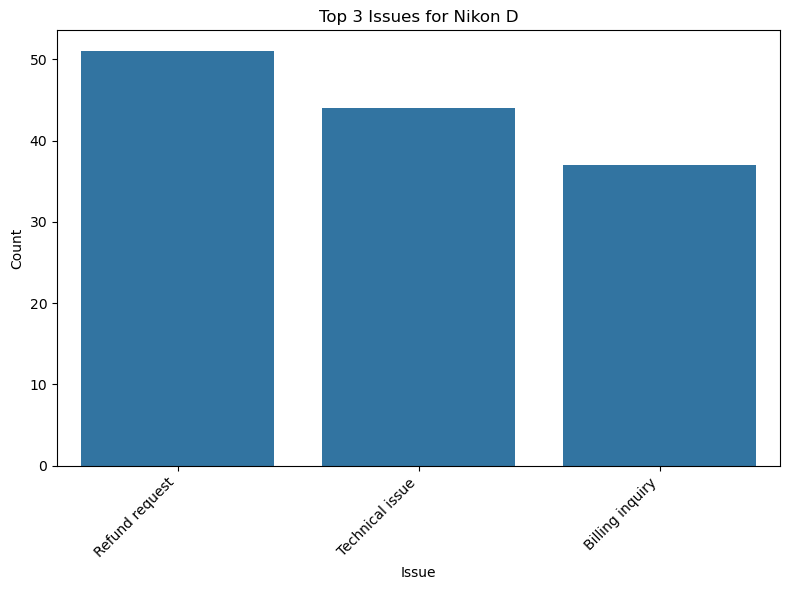

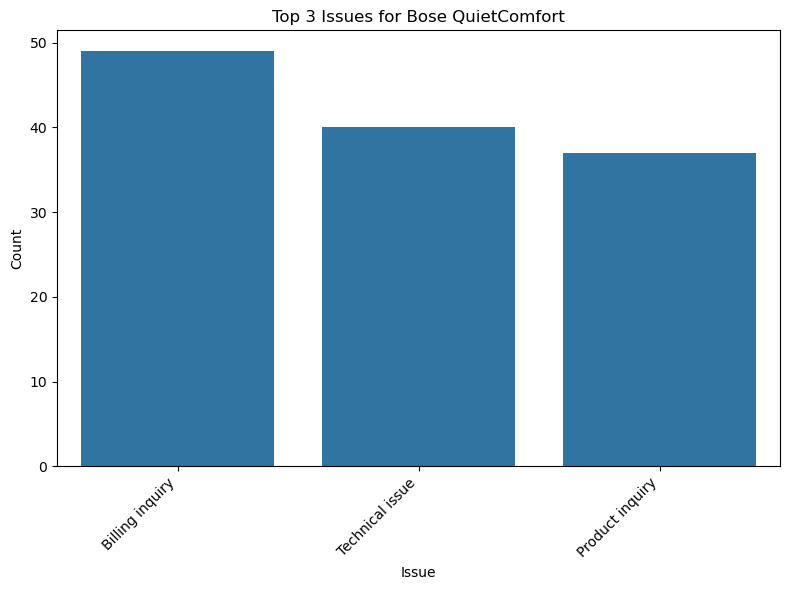

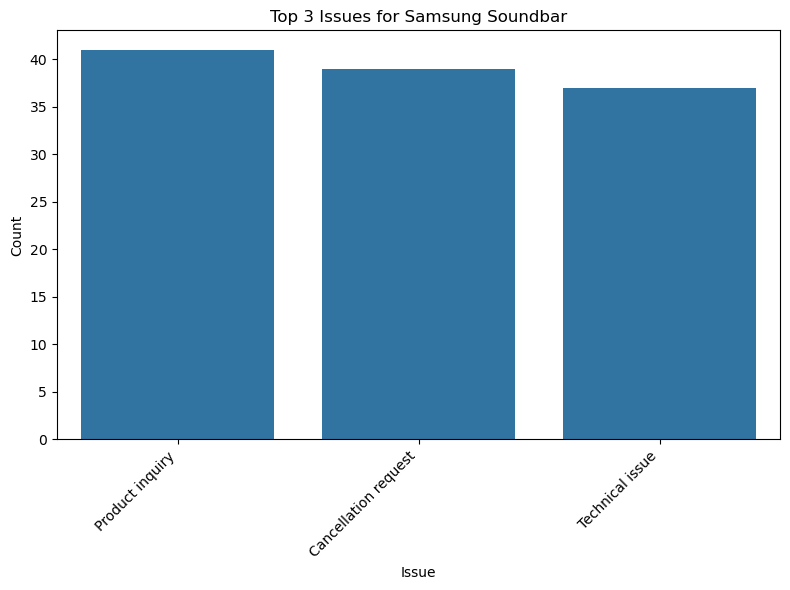

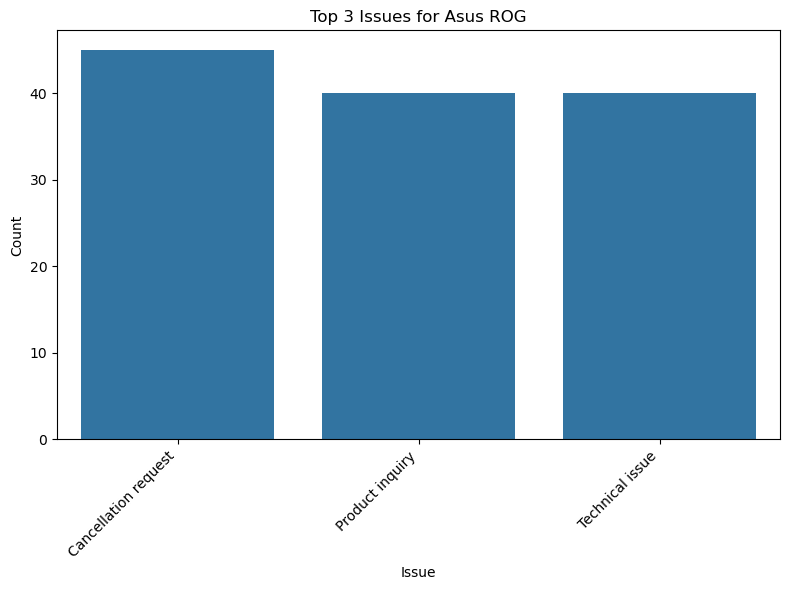

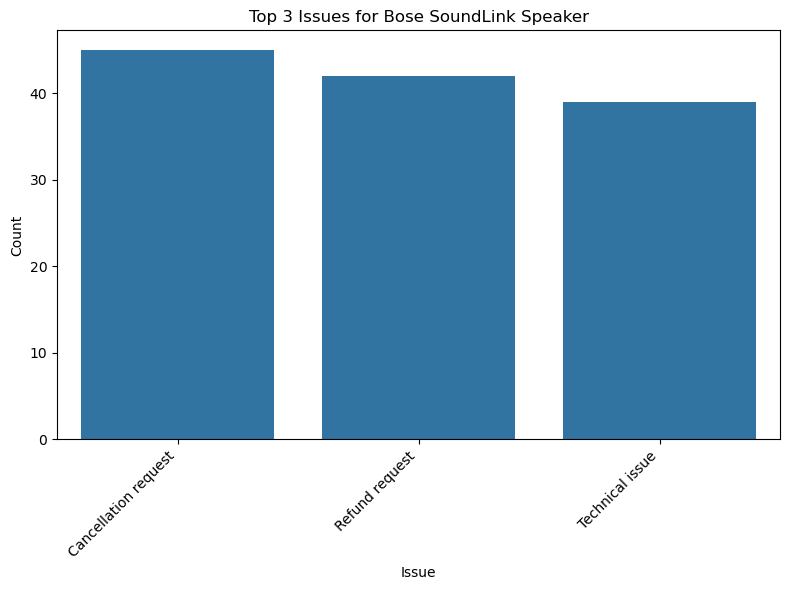

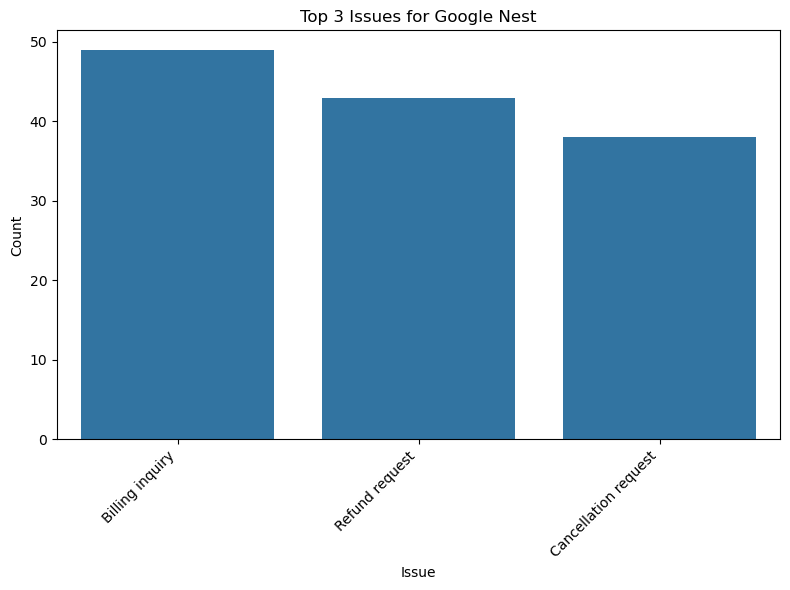

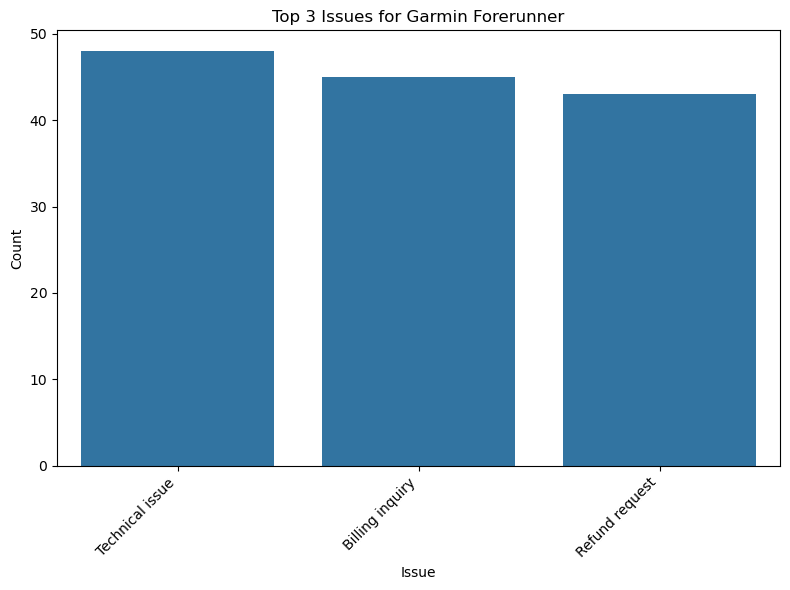

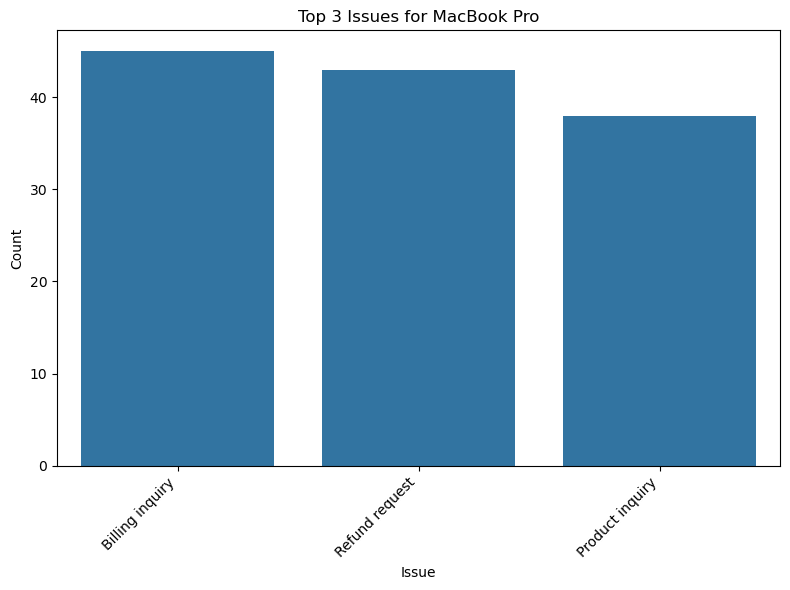

In [22]:
# prompt: for every product, make value count bar chart for top 3 issues that that product has

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded as in the previous code
# df = pd.read_csv("customer_support_tickets.csv")

def plot_top_issues(product):
    product_df = df[df['Product Purchased'] == product]
    top_issues = product_df['Ticket Type'].value_counts().nlargest(3)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_issues.index, y=top_issues.values)
    plt.title(f'Top 3 Issues for {product}')
    plt.xlabel('Issue')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


# Get unique products
products = df['Product Purchased'].unique()

for product in products:
    plot_top_issues(product)

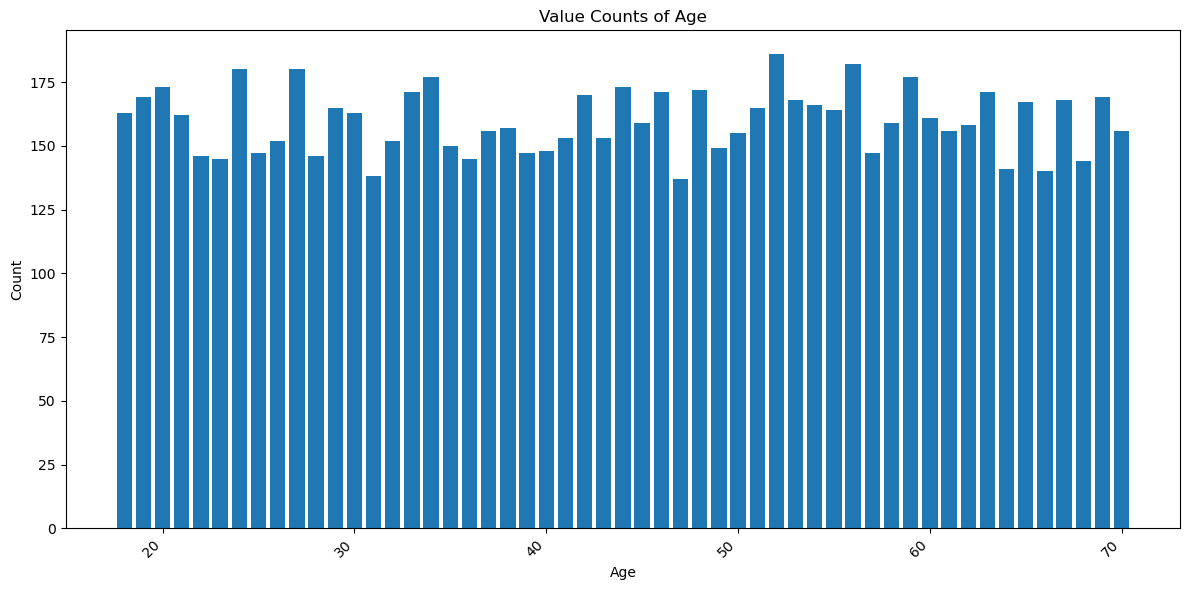

In [23]:
# prompt: value count bar chart for age, sorted by age on x axis

import pandas as pd
import matplotlib.pyplot as plt
# Assuming you've already loaded the dataframe 'df' as shown in the previous code.
# If not, run the previous code first.
df = pd.read_csv("customer_support_tickets.csv")

# Value counts of 'Age'
age_counts = df['Customer Age'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Value Counts of Age")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Age Group
[0, 10)      [Billing inquiry, Cancellation request, Produc...
[10, 20)     [Product inquiry, Refund request, Billing inqu...
[20, 30)     [Refund request, Cancellation request, Billing...
[30, 40)     [Technical issue, Cancellation request, Refund...
[40, 50)     [Technical issue, Product inquiry, Billing inq...
[50, 60)     [Technical issue, Refund request, Cancellation...
[60, 70)     [Refund request, Billing inquiry, Cancellation...
[70, 80)     [Cancellation request, Product inquiry, Refund...
[80, 90)     [Billing inquiry, Cancellation request, Produc...
[90, 100)    [Billing inquiry, Cancellation request, Produc...
dtype: object


/var/folders/k_/j12wvng15gl3tcld18kz67qr0000gn/T/ipykernel_75862/1498437876.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  issue_counts = df.groupby(['Age Group', 'Ticket Type'])['Ticket Type'].count().unstack()


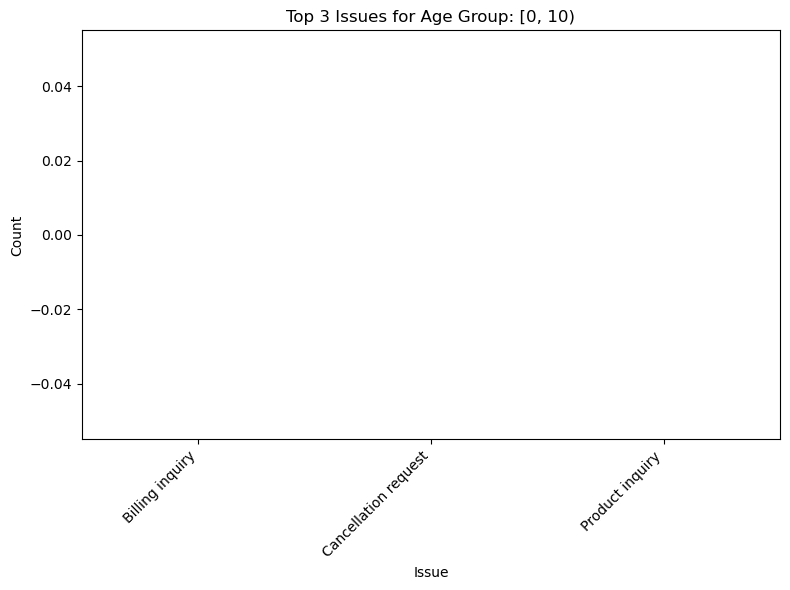

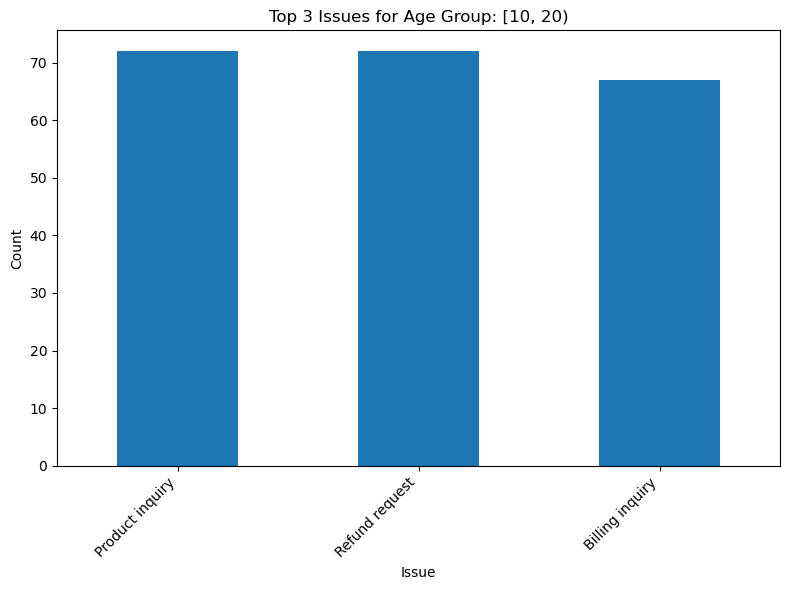

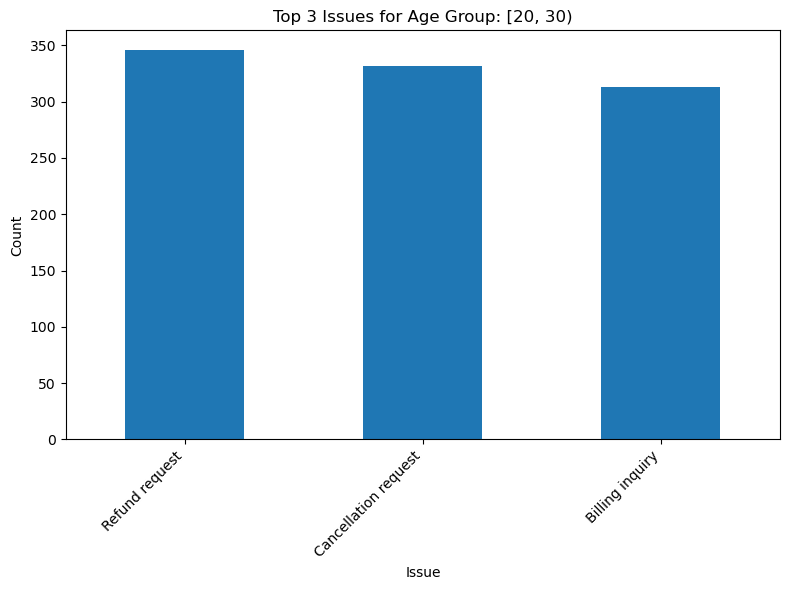

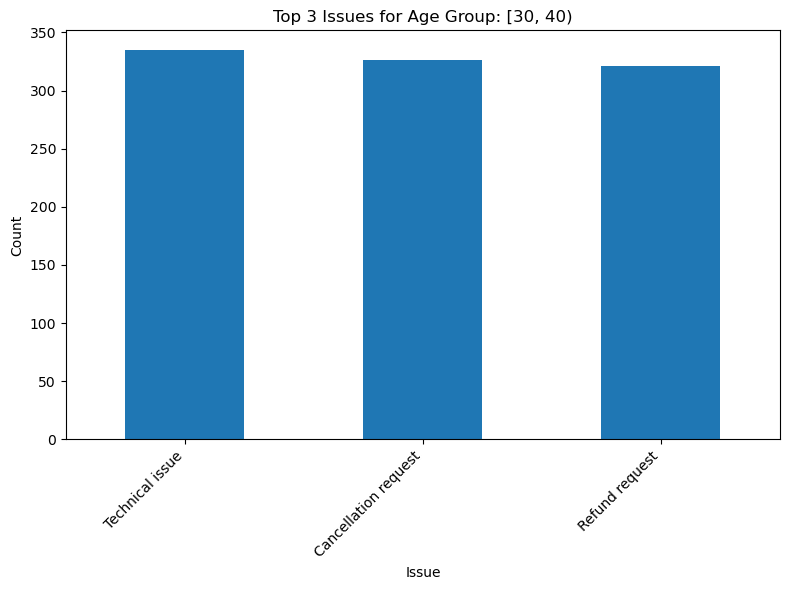

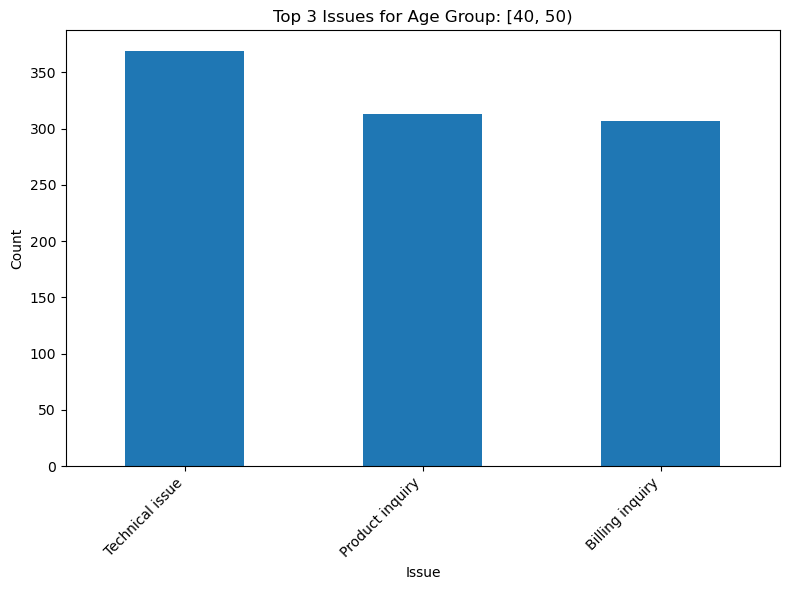

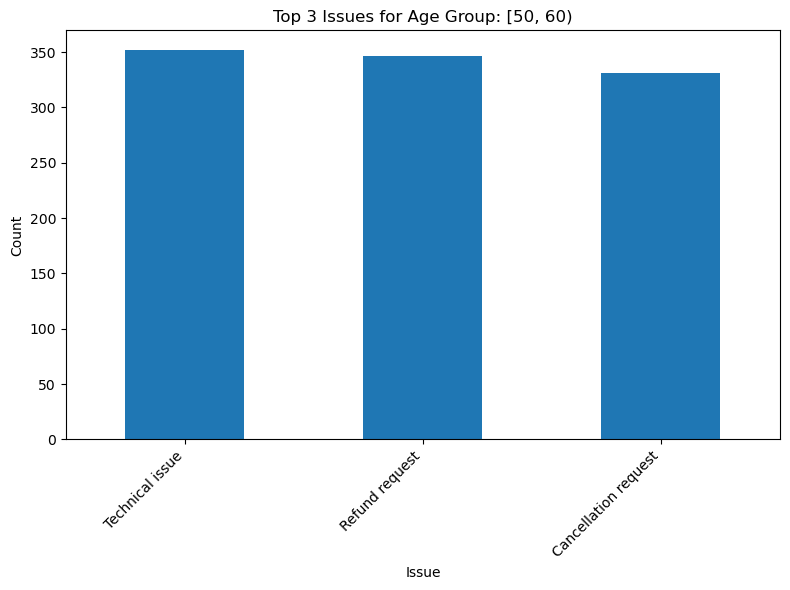

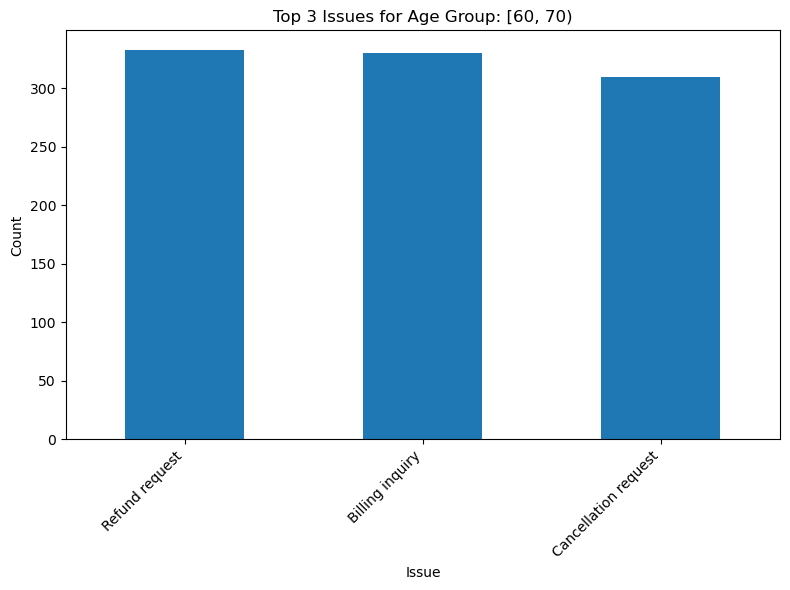

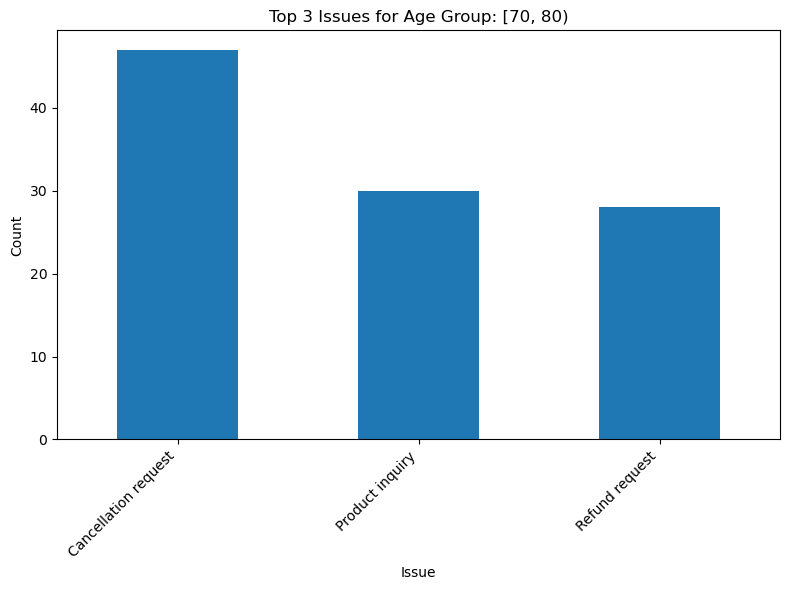

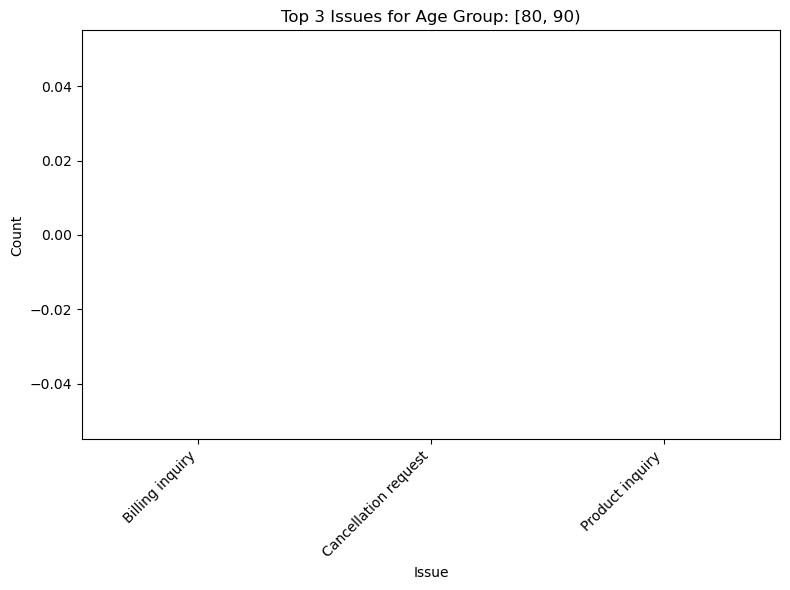

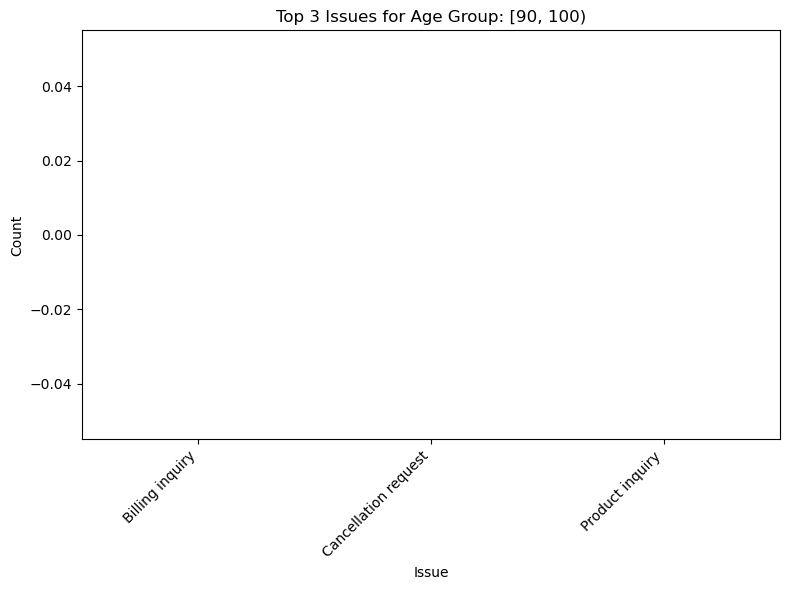

In [24]:
# Product Purchased
# prompt: top 3 issues by counts for every age group in bins of 10 years

import pandas as pd
import matplotlib.pyplot as plt

# Create age bins
df['Age Group'] = pd.cut(df['Customer Age'], bins=range(0, 101, 10), right=False)

# Group by age group and issue, then count occurrences
issue_counts = df.groupby(['Age Group', 'Ticket Type'])['Ticket Type'].count().unstack()

# Find the top 3 issues for each age group
top_3_issues = issue_counts.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Print the result
print(top_3_issues)


# Plotting (optional):  Visualize top 3 issues for each age group
for age_group, issues in top_3_issues.items():
    counts = issue_counts.loc[age_group][issues]
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar')
    plt.title(f'Top 3 Issues for Age Group: {age_group}')
    plt.xlabel('Issue')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Age Group
[0, 10)          [Adobe Photoshop, Amazon Echo, Amazon Kindle]
[10, 20)             [Philips Hue Lights, iPhone, LG Smart TV]
[20, 30)     [Amazon Echo, Dyson Vacuum Cleaner, Microsoft ...
[30, 40)            [GoPro Hero, LG Smart TV, Nest Thermostat]
[40, 50)     [LG OLED, Philips Hue Lights, Roomba Robot Vac...
[50, 60)     [GoPro Hero, Apple AirPods, Bose SoundLink Spe...
[60, 70)        [Sony Xperia, Lenovo ThinkPad, Sony 4K HDR TV]
[70, 80)     [Sony Xperia, Canon DSLR Camera, Nest Thermostat]
[80, 90)         [Adobe Photoshop, Amazon Echo, Amazon Kindle]
[90, 100)        [Adobe Photoshop, Amazon Echo, Amazon Kindle]
dtype: object


/var/folders/k_/j12wvng15gl3tcld18kz67qr0000gn/T/ipykernel_75862/2720017168.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  issue_counts = df.groupby(['Age Group', 'Product Purchased'])['Product Purchased'].count().unstack()


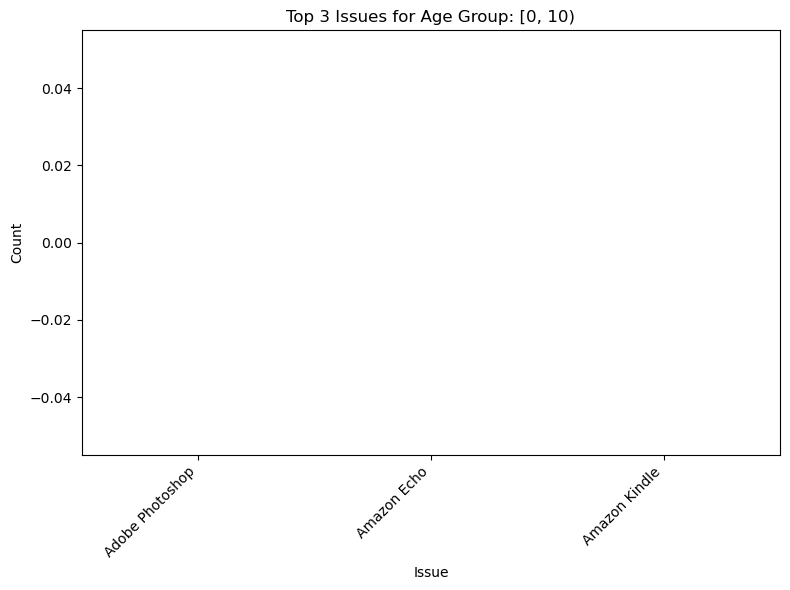

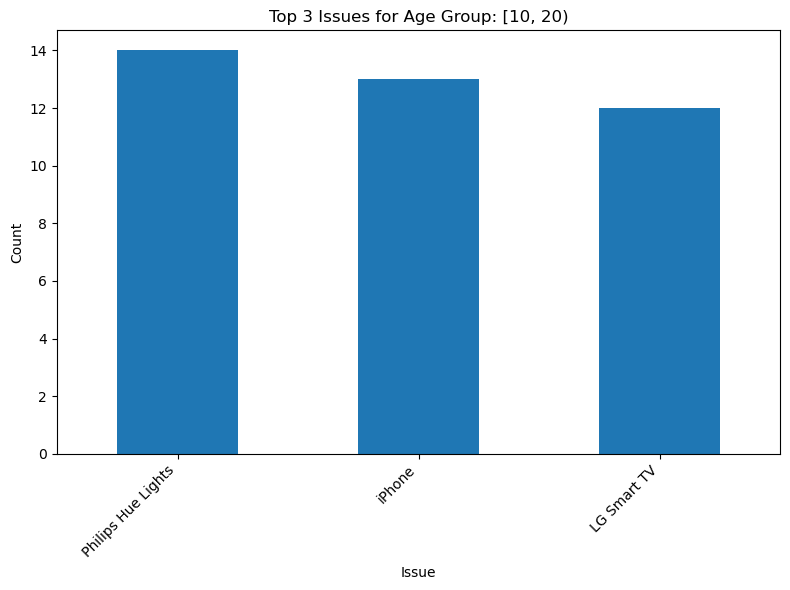

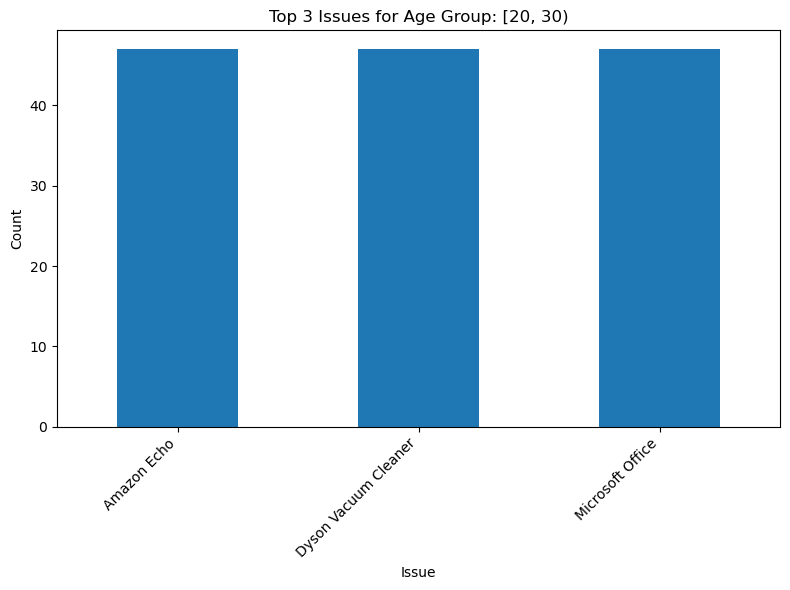

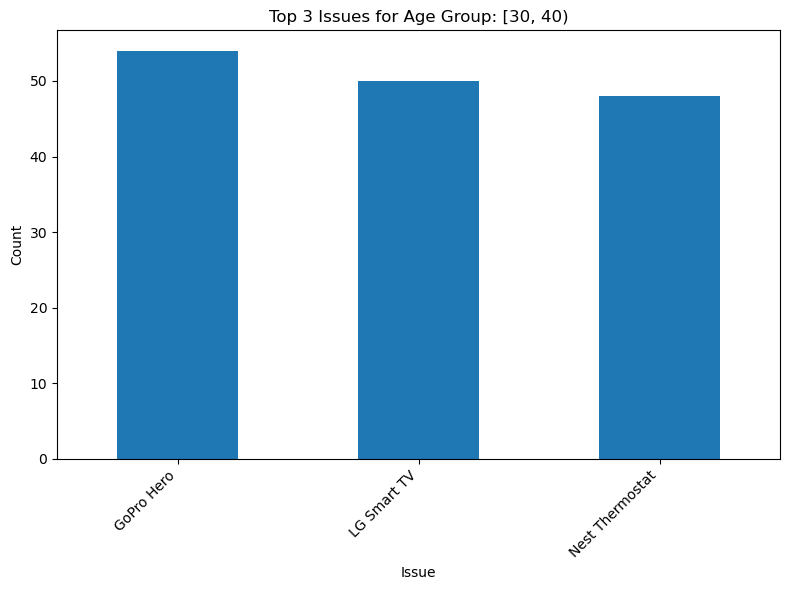

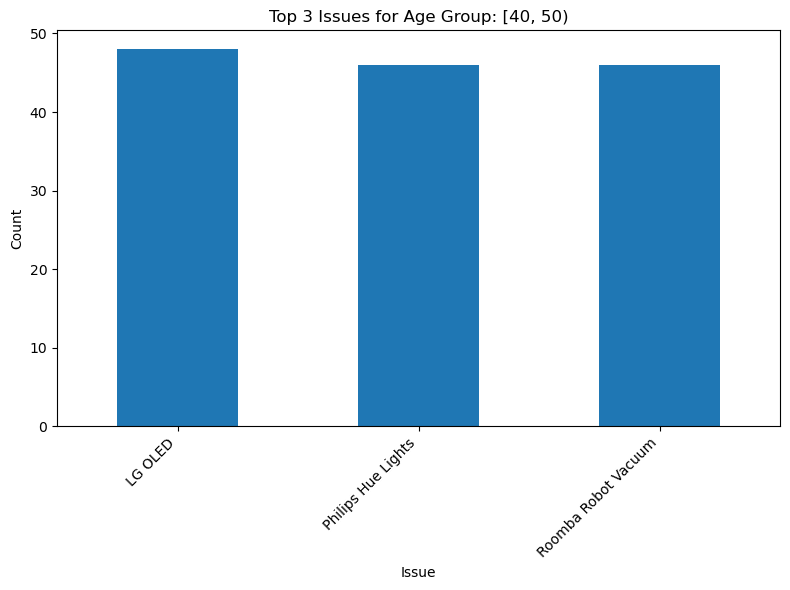

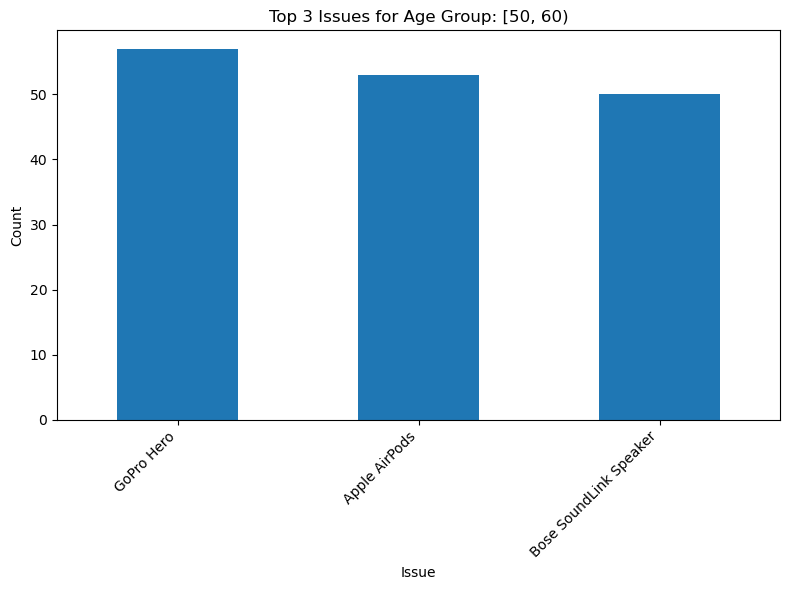

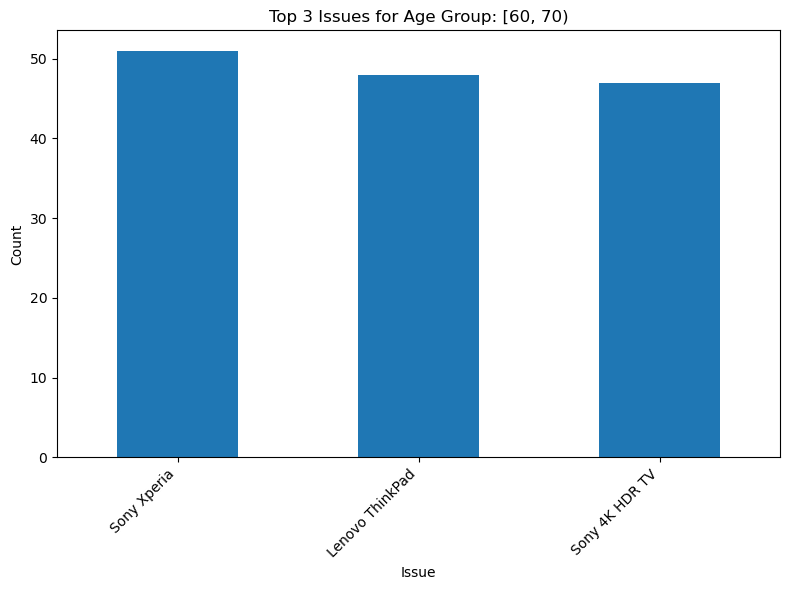

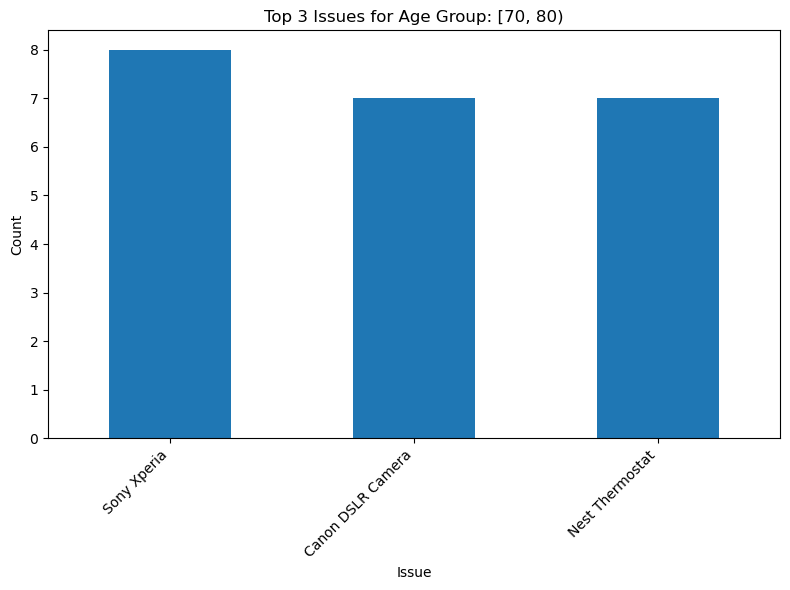

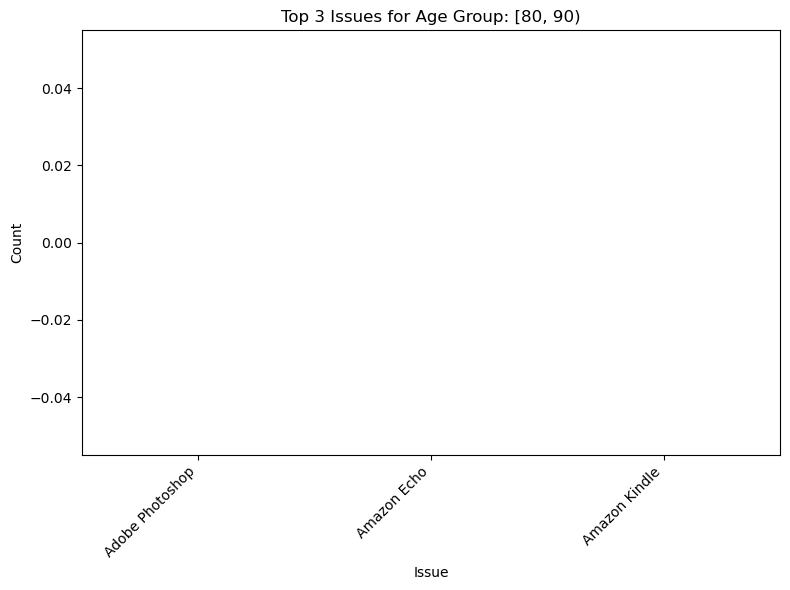

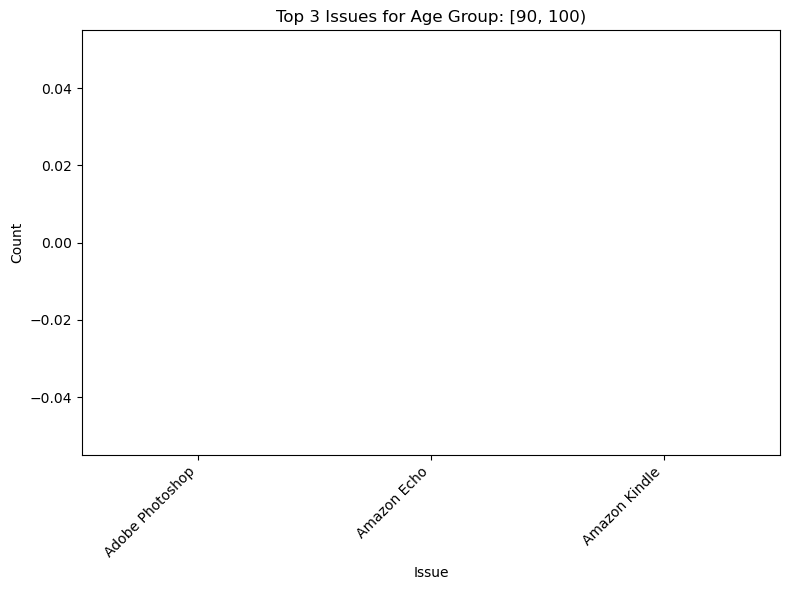

In [25]:
# prompt: top 3 issues by counts for every age group in bins of 10 years

import pandas as pd
import matplotlib.pyplot as plt

# Create age bins
df['Age Group'] = pd.cut(df['Customer Age'], bins=range(0, 101, 10), right=False)

# Group by age group and issue, then count occurrences
issue_counts = df.groupby(['Age Group', 'Product Purchased'])['Product Purchased'].count().unstack()

# Find the top 3 issues for each age group
top_3_issues = issue_counts.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Print the result
print(top_3_issues)


# Plotting (optional):  Visualize top 3 issues for each age group
for age_group, issues in top_3_issues.items():
    counts = issue_counts.loc[age_group][issues]
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar')
    plt.title(f'Top 3 Issues for Age Group: {age_group}')
    plt.xlabel('Issue')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [26]:
df["Ticket Type"].unique()

array(['Technical issue', 'Billing inquiry', 'Cancellation request',
       'Product inquiry', 'Refund request'], dtype=object)

In [27]:
df["Ticket Priority"].unique()

array(['Critical', 'Low', 'High', 'Medium'], dtype=object)

In [28]:
df["Ticket Subject"].unique()

array(['Product setup', 'Peripheral compatibility', 'Network problem',
       'Account access', 'Data loss', 'Payment issue', 'Refund request',
       'Battery life', 'Installation support', 'Software bug',
       'Hardware issue', 'Product recommendation', 'Delivery problem',
       'Display issue', 'Cancellation request', 'Product compatibility'],
      dtype=object)

In [29]:
df["Ticket Channel"].unique()

array(['Social media', 'Chat', 'Email', 'Phone'], dtype=object)

In [30]:
df["Ticket Status"].unique()

array(['Pending Customer Response', 'Closed', 'Open'], dtype=object)

python(79467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


58406.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


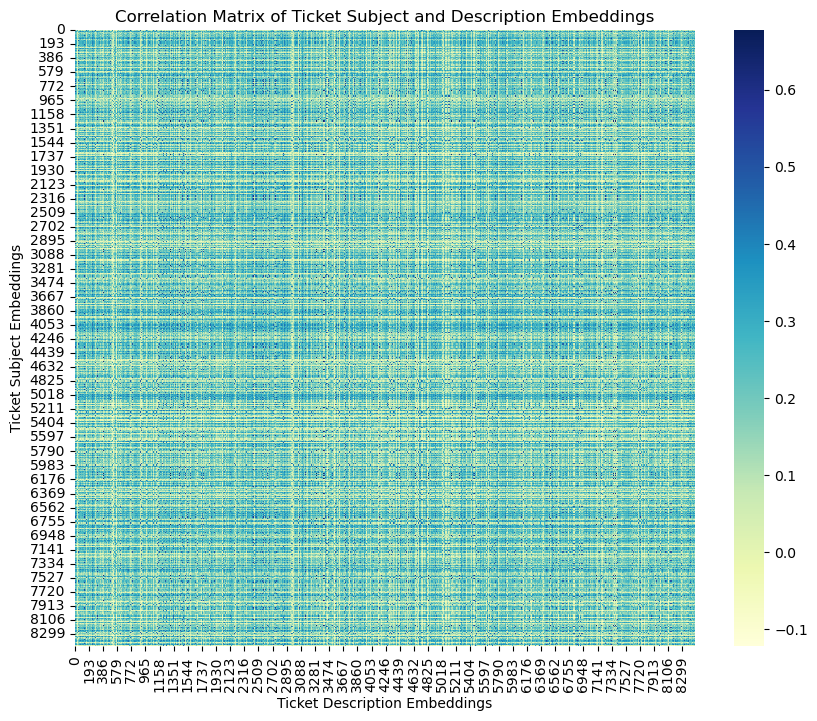

In [33]:
# prompt: "Ticket Subject", "Ticket Description" make an embedding of strings and make a correlatioin matrix heat map, use GUSE model

!pip install sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming customer_support_tickets.csv is in the current directory)
df = pd.read_csv("customer_support_tickets.csv")

# Select the relevant columns
text_data = df[["Ticket Subject", "Ticket Description"]]

# Initialize the GUSE model
model = SentenceTransformer('all-mpnet-base-v2') # Using a strong general-purpose model

# Generate embeddings for the "Ticket Subject" and "Ticket Description"
subject_embeddings = model.encode(df["Ticket Subject"].tolist())
description_embeddings = model.encode(df["Ticket Description"].tolist())

# Calculate cosine similarity between embeddings
correlation_matrix = util.cos_sim(subject_embeddings, description_embeddings)

# Convert the similarity matrix to a DataFrame for visualization
correlation_df = pd.DataFrame(correlation_matrix.numpy())

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, cmap="YlGnBu")
plt.title("Correlation Matrix of Ticket Subject and Description Embeddings")
plt.xlabel("Ticket Description Embeddings")
plt.ylabel("Ticket Subject Embeddings")
plt.show()

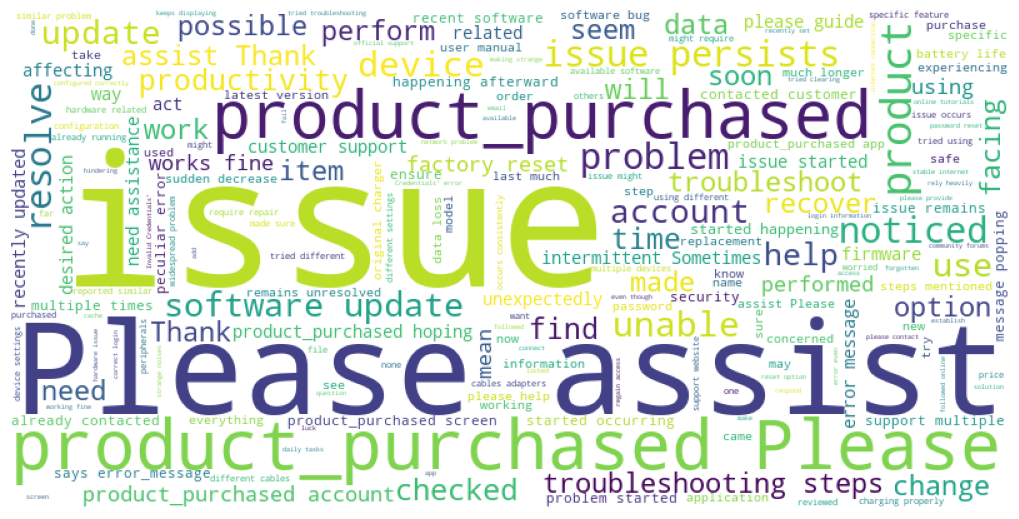

In [35]:
# prompt: "Ticket Description" word cloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all ticket descriptions into a single string
text = " ".join(df["Ticket Description"].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [36]:
df["Ticket Description"][100]

"I'm having an issue with the {product_purchased}. Please assist. I'm using what is on my phone right now. I also have an issue with a product that was sold out of style, not due to an oversize. I've tried clearing the cache and data for the {product_purchased} app, but the issue persists."